In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Creating output directories if they don't exist
os.makedirs('visualisations', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Setting plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
print("excuted")

excuted


In [5]:
# Loading the dataset
file_path = 'Data.csv'
df = pd.read_csv(file_path)

# Displaying basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Checking data types
print("\nData types:")
display(df.dtypes)

# Checking for missing values
print("\nMissing values:")
display(df.isnull().sum())

# Checking for non-numeric values in numeric columns
numeric_columns = df.columns.drop('time')
non_numeric_counts = {}

for col in numeric_columns:
    non_numeric_mask = pd.to_numeric(df[col], errors='coerce').isna()
    non_numeric_counts[col] = non_numeric_mask.sum()

print("\nNon-numeric values per column:")
display(pd.Series(non_numeric_counts))
print("excuted")

Dataset shape: (377719, 7)

First 5 rows:


time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0  1/1/2017 0:00                 867.63                910.42   
1  1/1/2017 0:05                 879.23                918.14   
2  1/1/2017 0:10                 875.67                924.18   
3  1/1/2017 0:15                 875.28                923.15   
4  1/1/2017 0:20                 891.66                934.26   

  Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                  -189.54            -186.04                  852.13   
1                  -184.33             -182.1                  862.53   
2                  -181.26            -166.47                  866.06   
3                  -179.15            -174.83                  865.85   
4                  -178.32            -173.72                  876.06   

  Cyclone_Inlet_Draft  
0              -145.9  
1             -149.76  
2             -145.01  
3             -142.82  
4             -143.39


Data types:


time                        object
Cyclone_Inlet_Gas_Temp      object
Cyclone_Material_Temp       object
Cyclone_Outlet_Gas_draft    object
Cyclone_cone_draft          object
Cyclone_Gas_Outlet_Temp     object
Cyclone_Inlet_Draft         object
dtype: object


Missing values:


time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64


Non-numeric values per column:


Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

excuted


In [7]:
#Data Prepocessing
# Converting time to datetime
df['time'] = pd.to_datetime(df['time'])

# Converting numeric columns to float and handling non-numeric values
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filling missing values with the median of their respective columns
# Using median because it's less susceptible to outliers
for col in numeric_columns:
    col_median = df[col].median()
    df[col] = df[col].fillna(col_median)

# Checking basic statistics after preprocessing
print("Basic statistics after preprocessing:")
display(df.describe())

# Saving the preprocessed data
df.to_csv('processed_data.csv', index=False)
print("Preprocessing complete. Data saved to 'processed_data.csv'")


Basic statistics after preprocessing:


time  Cyclone_Inlet_Gas_Temp  \
count                      377719           377719.000000   
mean   2018-10-20 02:10:21.647840              727.890332   
min           2017-01-01 00:00:00                0.000000   
25%           2017-11-24 21:07:30              856.490000   
50%           2018-10-19 18:10:00              882.380000   
75%           2019-09-13 15:12:30              901.040000   
max           2020-08-07 12:15:00             1157.630000   
std                           NaN              328.217555   

       Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  \
count          377719.000000             377719.000000       377719.000000   
mean              751.515078               -177.951622         -164.691394   
min              -185.000000               -456.660000         -459.310000   
25%               868.090000               -247.080000         -226.670000   
50%               913.360000               -215.260000         -198.560000   
75%               943.510000               -170.560000         -144.440000   
max              1375.000000                 40.270000          488.860000   
std               350.339390                 98.998385           89.967804   

       Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  
count             377719.00000        377719.000000  
mean                 716.30473          -141.401405  
min                   13.79000          -396.370000  
25%                  803.59000          -193.400000  
50%                  871.52500          -169.460000  
75%                  899.19000          -136.690000  
max                 1375.00000            41.640000  
std                  324.90718            77.497474

Preprocessing complete. Data saved to 'processed_data.csv'


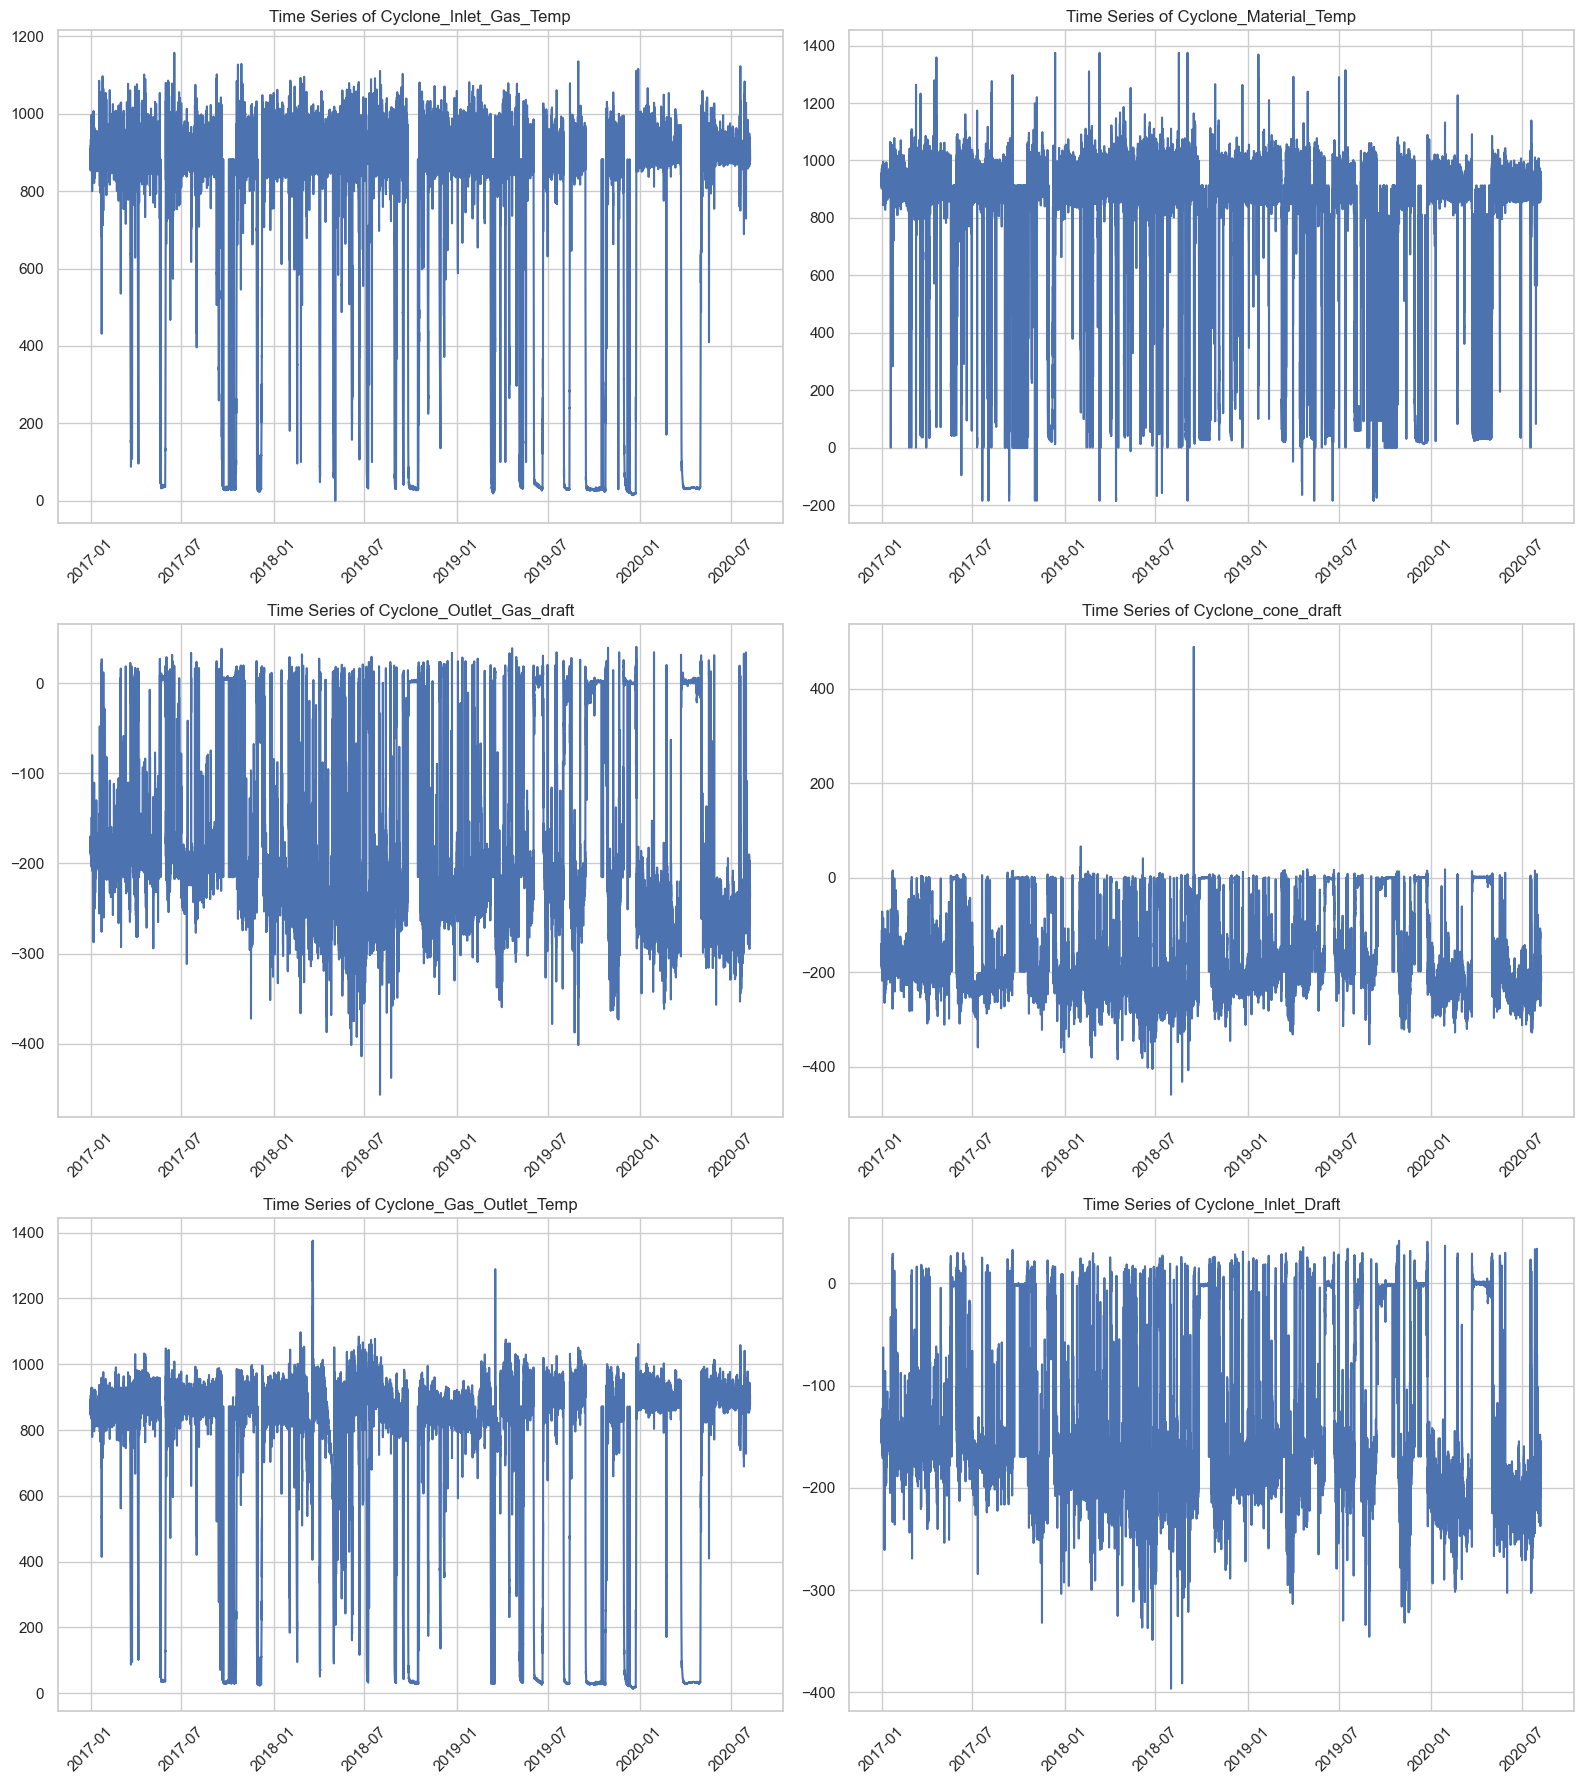

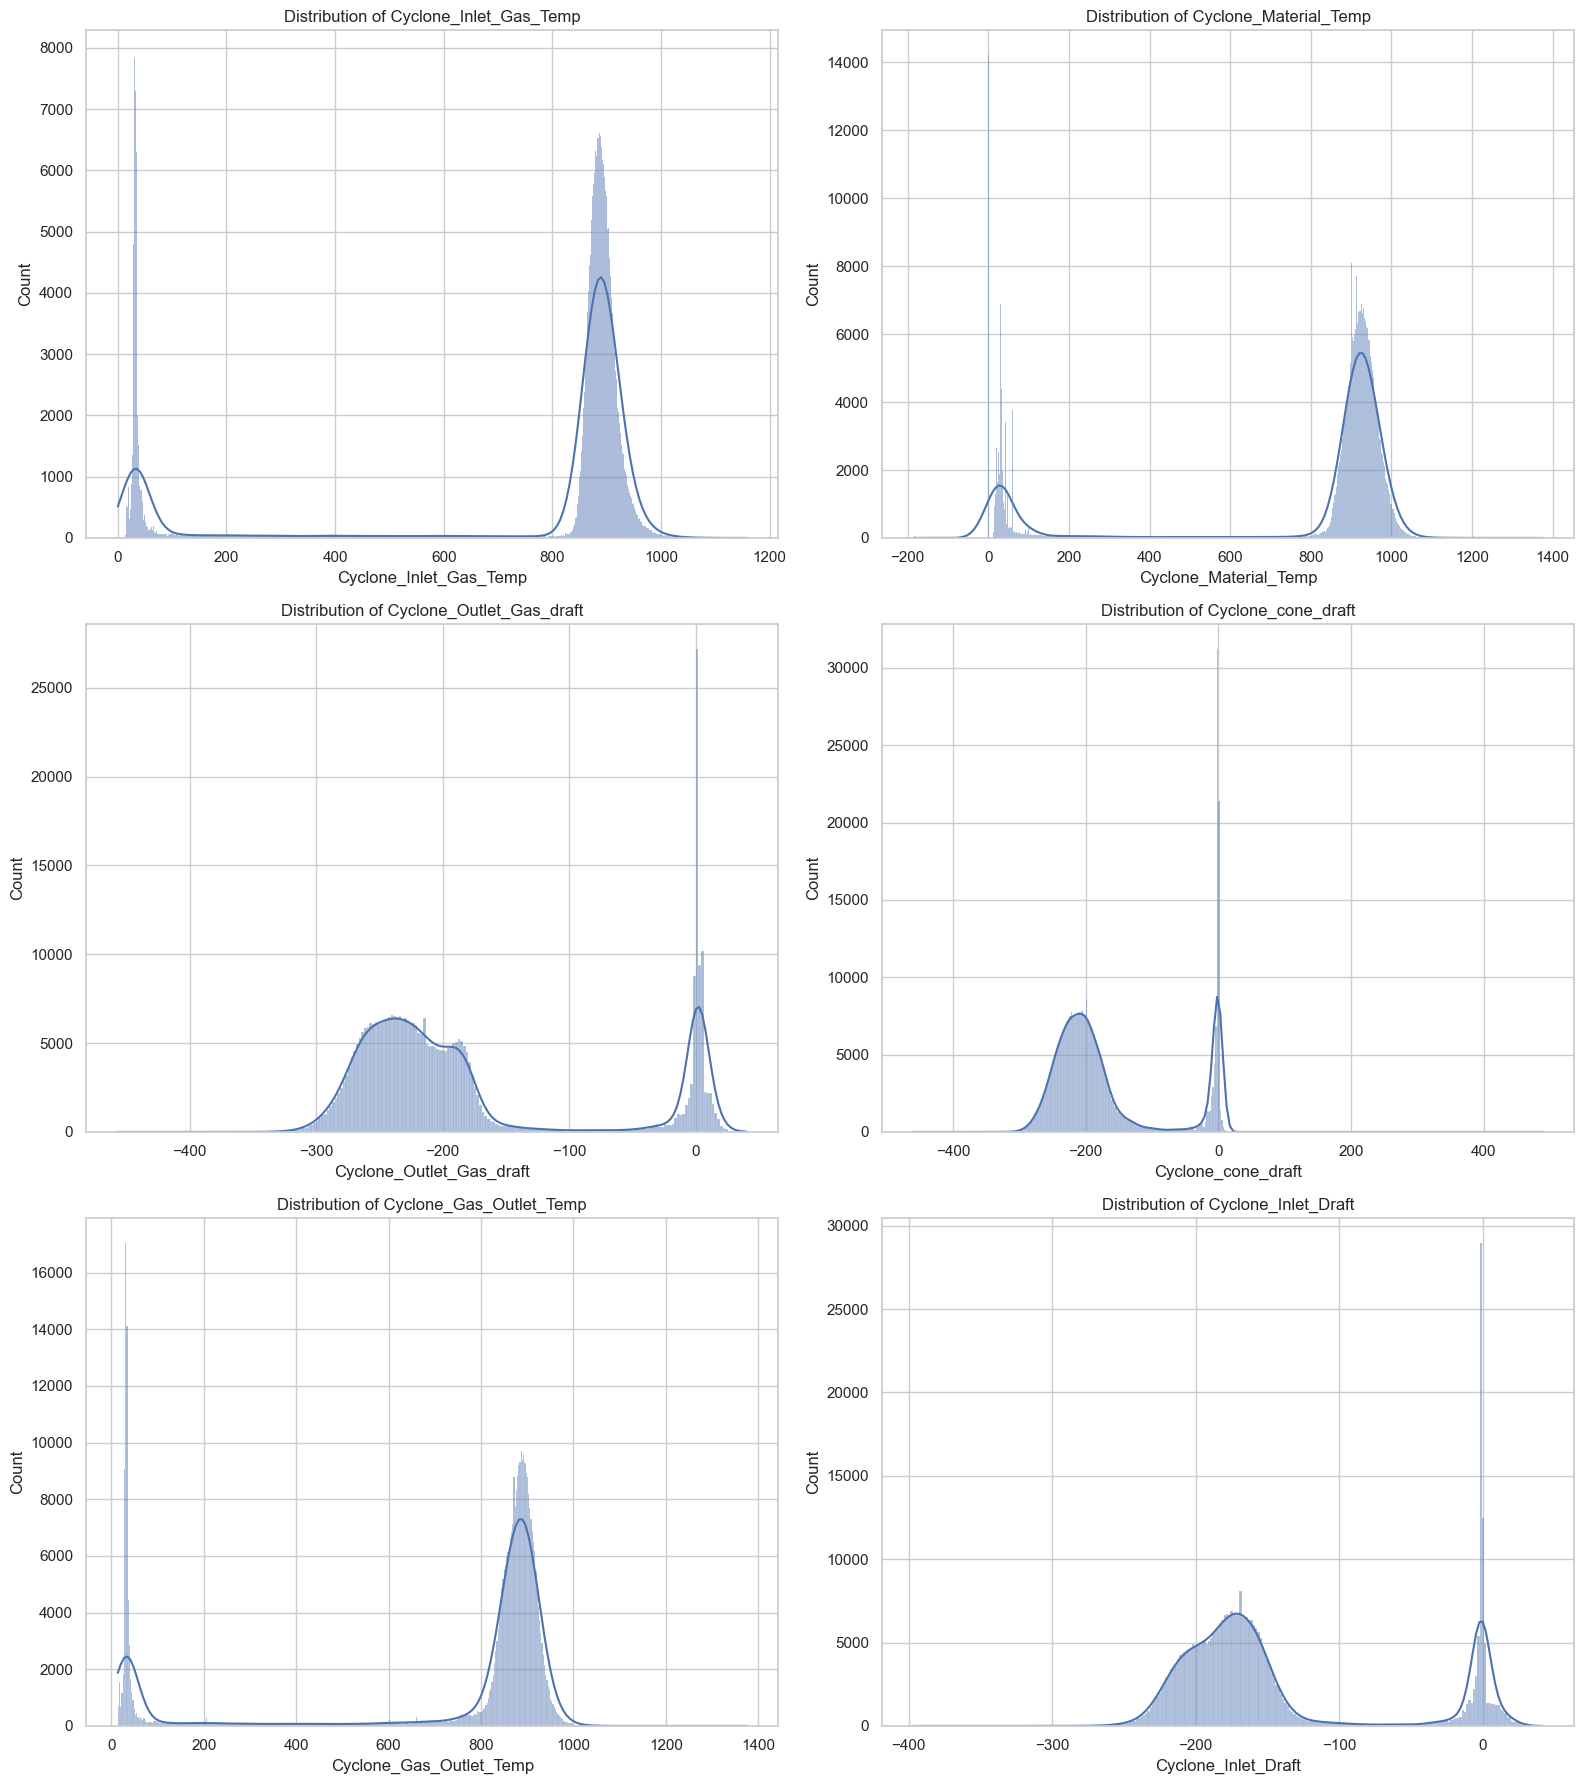

executed


In [8]:
# Visualizing the time series data
plt.figure(figsize=(16, 18))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    plt.plot(df['time'], df[col])
    plt.title(f'Time Series of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.savefig('visualisations/time_series.png')
plt.show()

# Visualizing the data distributions
plt.figure(figsize=(16, 18))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('visualisations/feature_distributions.png')
plt.show()
print("executed")

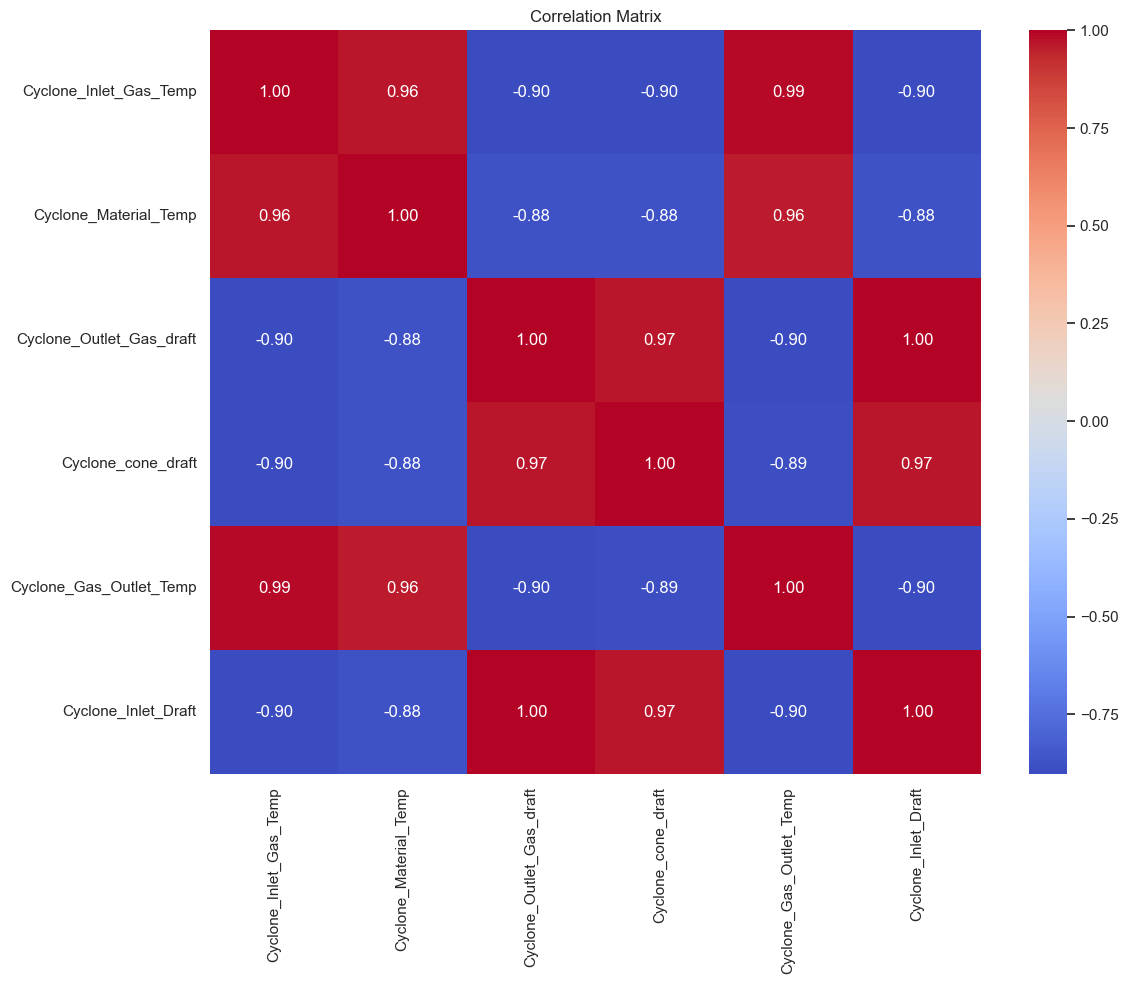

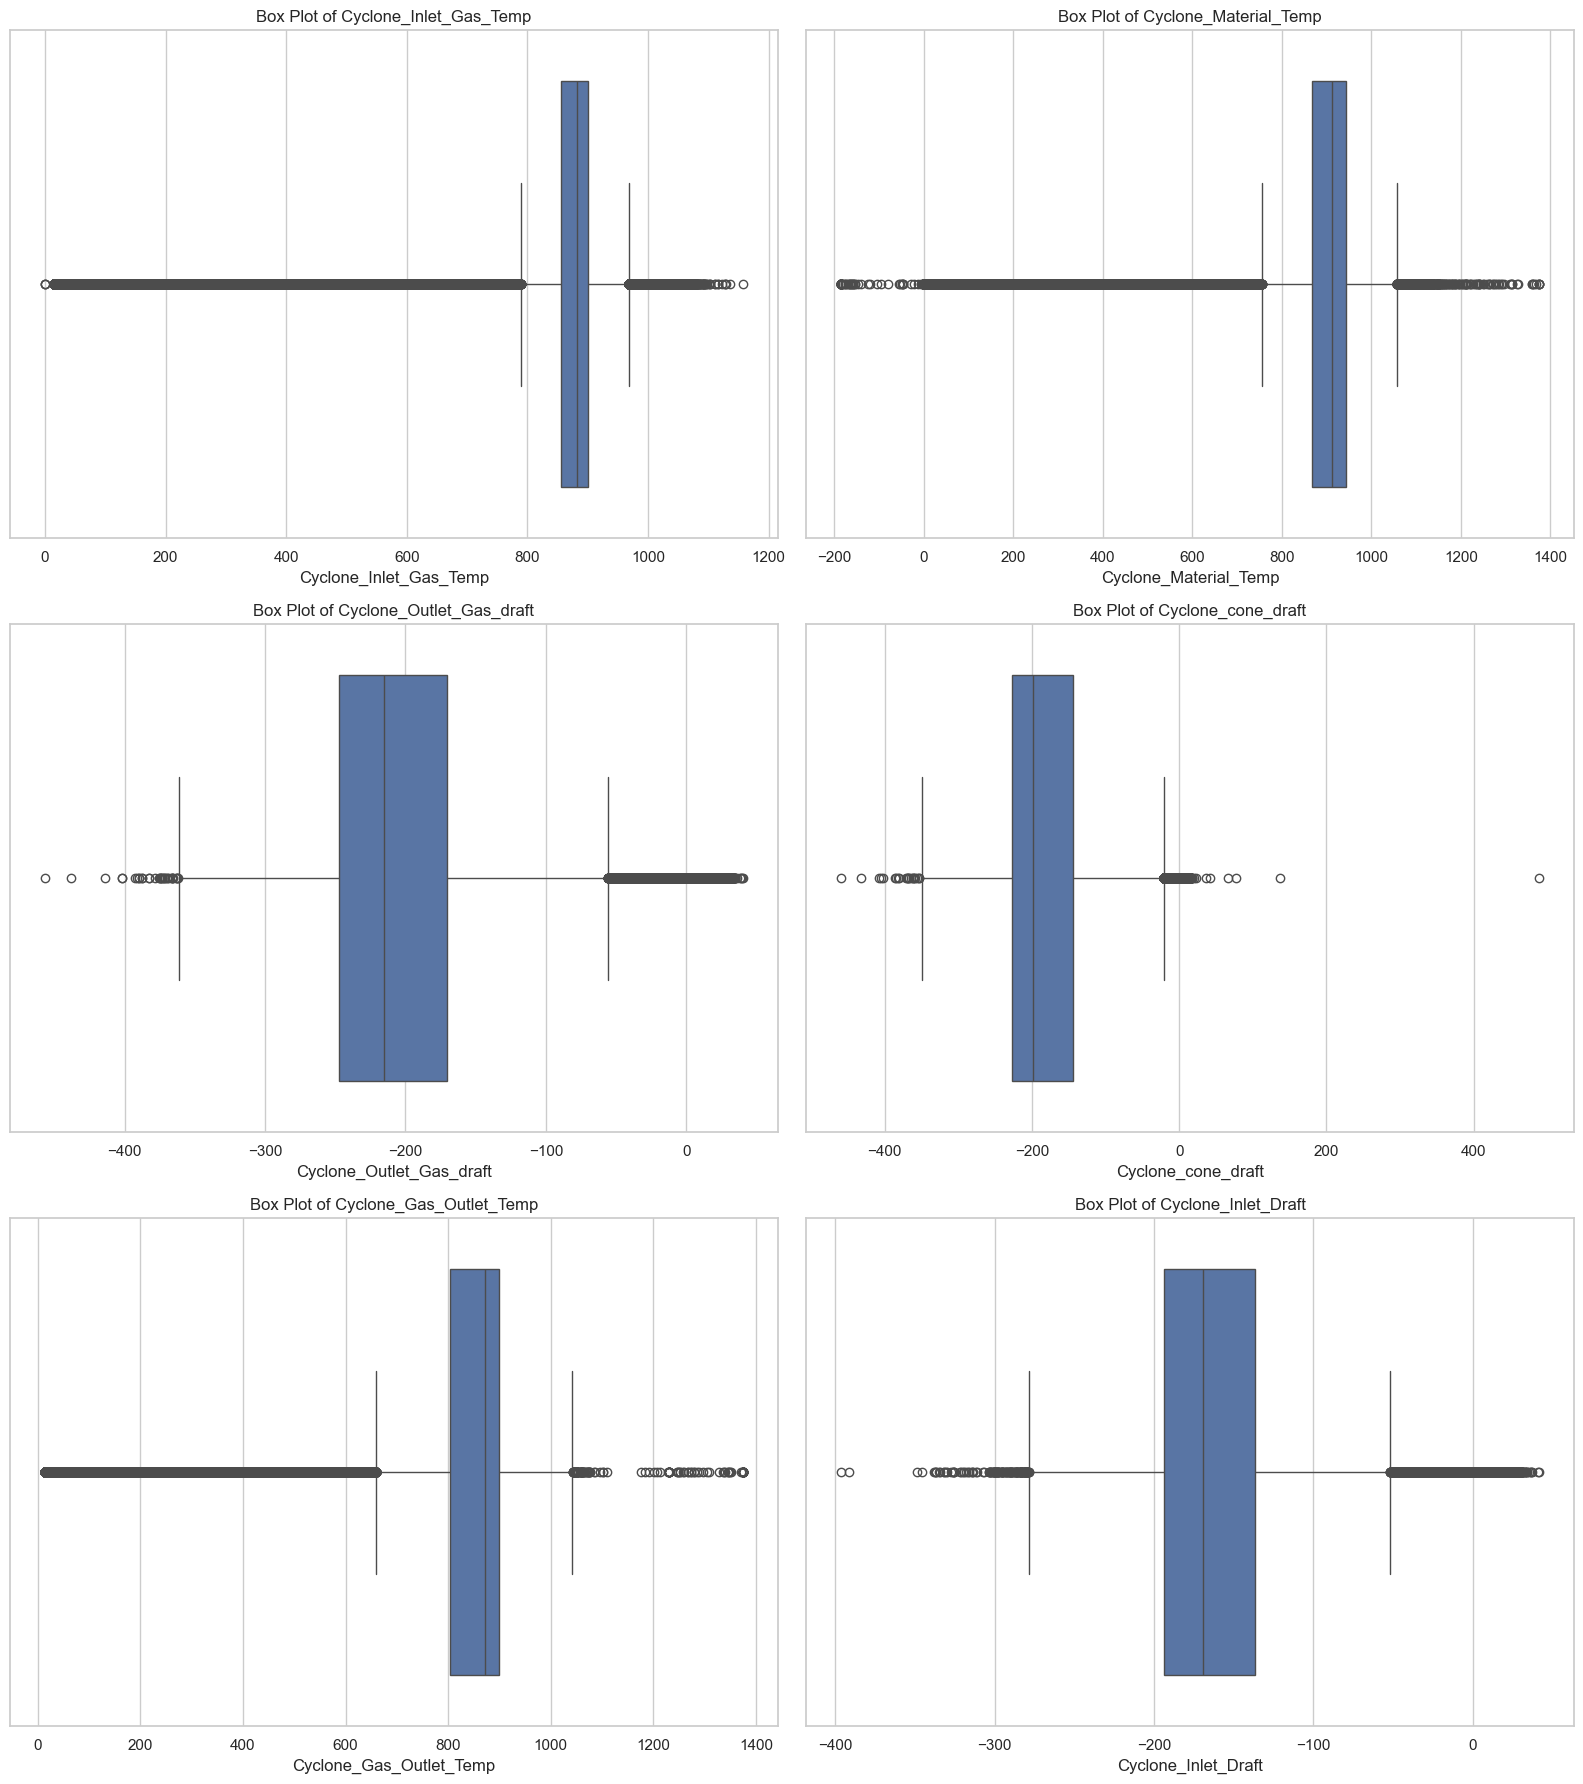

Preprocessing Summary:
- Original dataset shape: (377719, 7)
- Time period: 2017-01-01 00:00:00 to 2020-08-07 12:15:00
- Duration: 1314 days
- Non-numeric values handled: 8195


In [9]:
#Feature correlation and outlier visualization
# Creating correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('visualisations/correlation_matrix.png')
plt.show()

# Checking for outliers using box plots
plt.figure(figsize=(16, 18))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('visualisations/boxplots.png')
plt.show()

# Displaying a summary of the preprocessing
print("Preprocessing Summary:")
print(f"- Original dataset shape: {df.shape}")
print(f"- Time period: {df['time'].min()} to {df['time'].max()}")
print(f"- Duration: {(df['time'].max() - df['time'].min()).days} days")
print(f"- Non-numeric values handled: {sum(non_numeric_counts.values())}")

In [10]:
#Feature scaling with Min-Max
# Applying Min-Max scaling to the features
print("Applying Min-Max scaling to features...")

# Creating a copy of the dataframe with numeric features only
features = df[numeric_columns]

# Initializing the Min-Max scaler
scaler = MinMaxScaler()

# Fitting and transforming the data
scaled_features = scaler.fit_transform(features)

# Creating a new dataframe with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Adding the time column back to the dataframe
scaled_df['time'] = df['time'].reset_index(drop=True)

# Displaying the first few rows of scaled data
print("\nFirst 5 rows of scaled data:")
display(scaled_df.head())

# Saving the scaled data
scaled_df.to_csv('scaled_data.csv', index=False)
print("Feature scaling complete. Data saved to 'scaled_data.csv'")

Applying Min-Max scaling to features...

First 5 rows of scaled data:


Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  Cyclone_Outlet_Gas_draft  \
0                0.749488               0.702192                  0.537540   
1                0.759509               0.707141                  0.548025   
2                0.756433               0.711013                  0.554203   
3                0.756097               0.710353                  0.558449   
4                0.770246               0.717474                  0.560119   

   Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  Cyclone_Inlet_Draft  \
0            0.288208                 0.615879             0.571836   
1            0.292363                 0.623519             0.563024   
2            0.308848                 0.626112             0.573868   
3            0.300031                 0.625958             0.578868   
4            0.301201                 0.633458             0.577567   

                 time  
0 2017-01-01 00:00:00  
1 2017-01-01 00:05:00  
2 2017-01-01 00:10:00  
3 2017-01-01 00:15:00  
4 2017-01-01 00:20:00

Feature scaling complete. Data saved to 'scaled_data.csv'


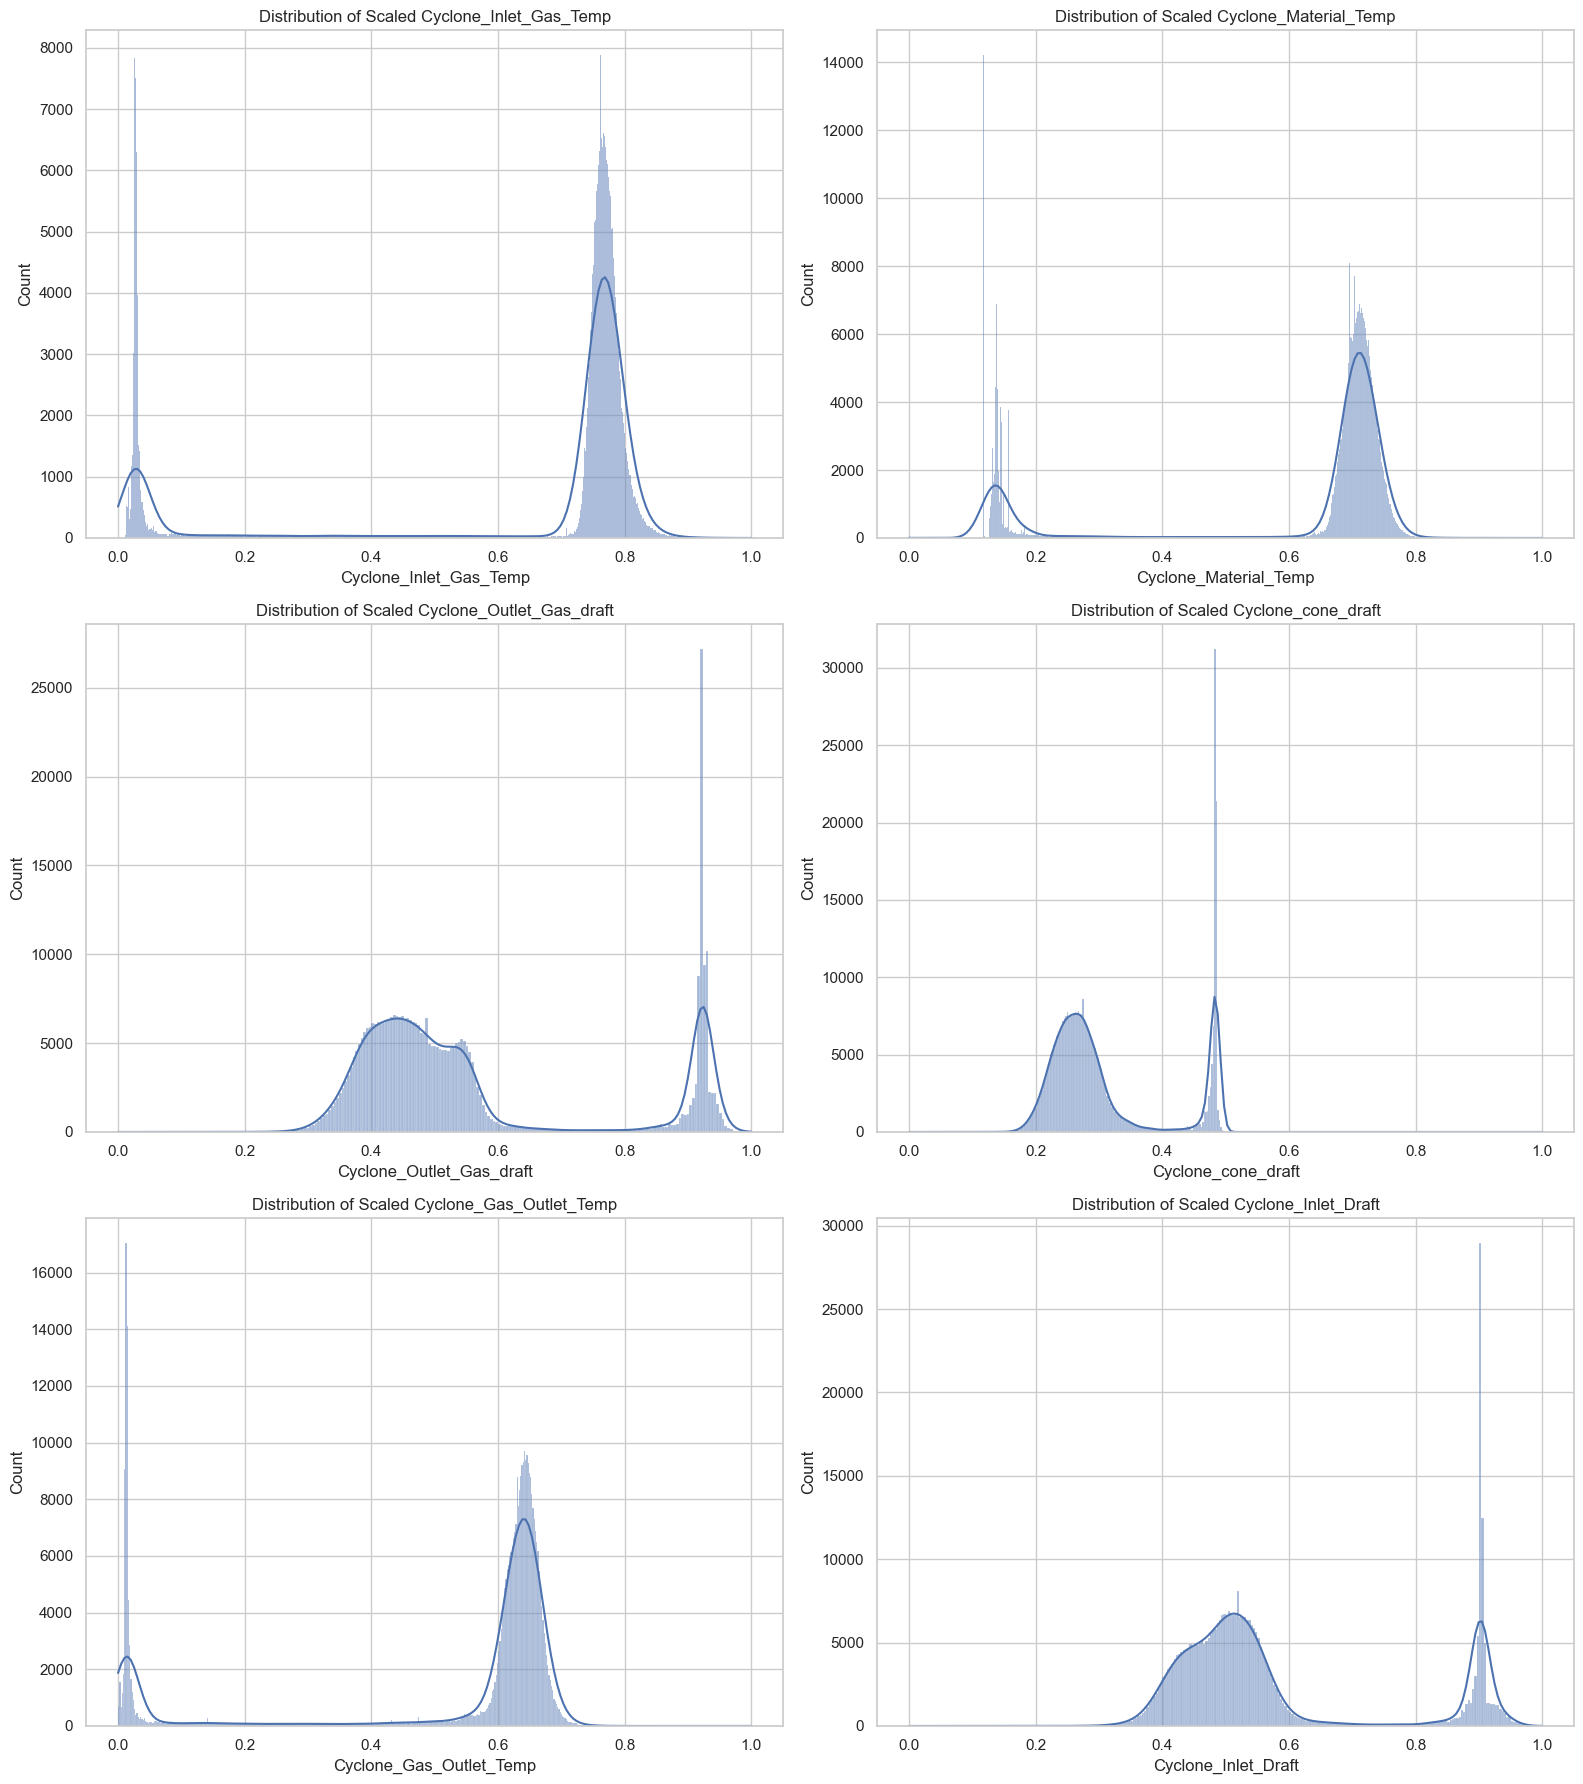

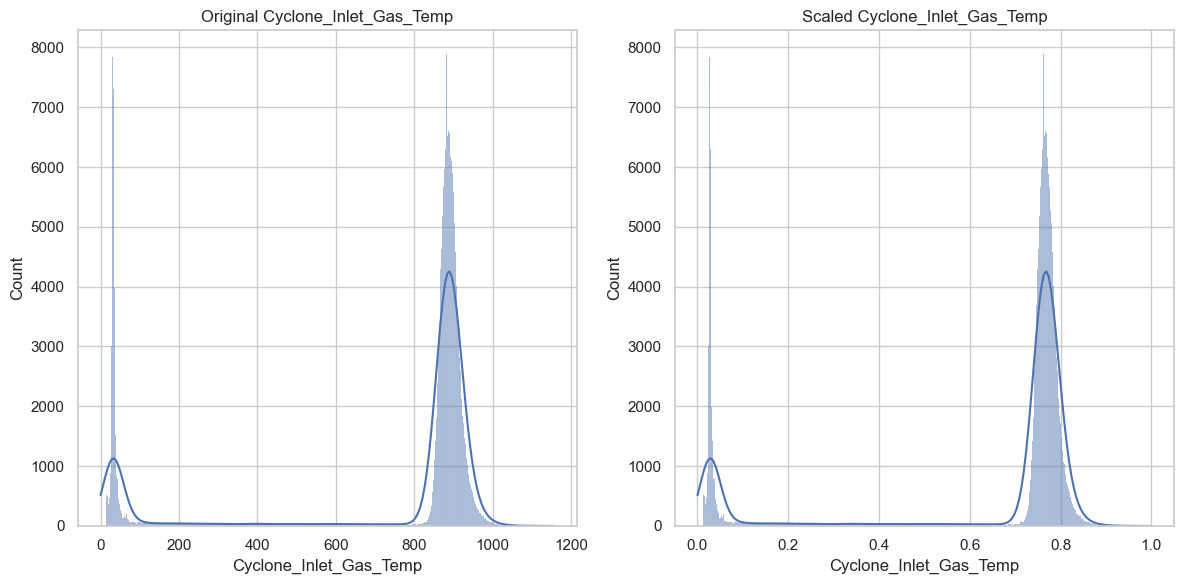

executed


In [11]:
#Visualizing scaled features
# Visualizing the scaled features
plt.figure(figsize=(16, 18))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(scaled_df[col], kde=True)
    plt.title(f'Distribution of Scaled {col}')
plt.tight_layout()
plt.savefig('visualisations/scaled_distributions.png')
plt.show()

# Comparing original vs scaled data for one feature
sample_feature = numeric_columns[0]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[sample_feature], kde=True)
plt.title(f'Original {sample_feature}')

plt.subplot(1, 2, 2)
sns.histplot(scaled_df[sample_feature], kde=True)
plt.title(f'Scaled {sample_feature}')

plt.tight_layout()
plt.savefig('visualisations/original_vs_scaled.png')
plt.show()
print("executed")

In [12]:
#Setting up for DBSCAN parameter optimization
# Preparing for DBSCAN parameter optimization
print("Setting up for DBSCAN parameter optimization...")

# Getting the features for analysis (excluding the time column)
X = scaled_df[numeric_columns].values

# Calculating batch size for processing
batch_size = 10000
num_batches = len(X) // batch_size + (1 if len(X) % batch_size != 0 else 0)

print(f"Number of data points: {len(X)}")
print(f"Dividing data into {num_batches} batches of approximately {batch_size} points each")

# Defining a range of min_samples to test
min_samples_range = list(range(10, 101, 10))  # Testing 10, 20, ..., 100
print(f"Will test min_samples values: {min_samples_range}")

# Setting up tracking for k-distance calculation
k = 5  # Starting value for k-nearest neighbors
all_kdistances = []

print("Beginning batch processing for k-distance calculation...")

Setting up for DBSCAN parameter optimization...
Number of data points: 377719
Dividing data into 38 batches of approximately 10000 points each
Will test min_samples values: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Beginning batch processing for k-distance calculation...


Processing batch 1/38 (points 0 to 10000)


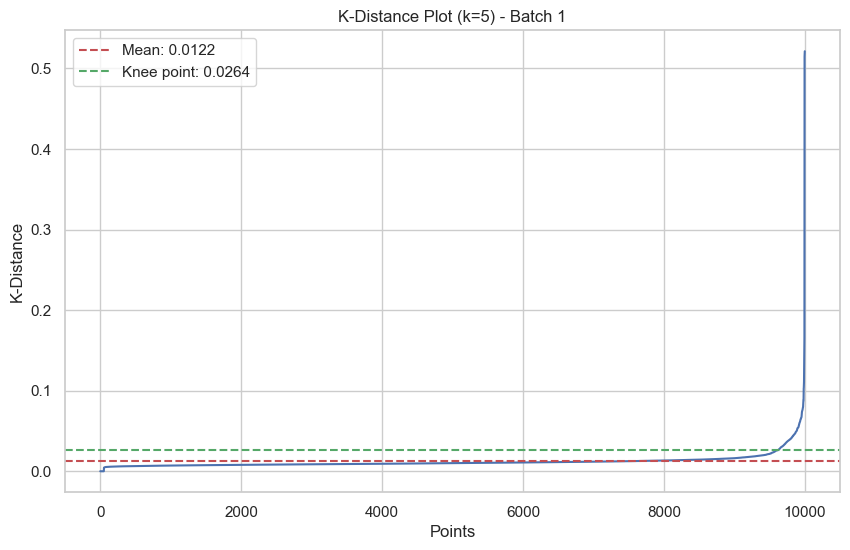

Estimated optimal eps for batch 1: 0.0264


In [13]:
#K-distance calculation for the first batch
# Processing the first batch for k-distance calculation
batch_idx = 0
start_idx = batch_idx * batch_size
end_idx = min((batch_idx + 1) * batch_size, len(X))

print(f"Processing batch {batch_idx+1}/{num_batches} (points {start_idx} to {end_idx})")
X_batch = X[start_idx:end_idx]

# Computing k-nearest neighbor distances
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_batch)
distances, indices = nbrs.kneighbors(X_batch)

# Sorting distances (k-th nearest neighbor)
kdistances = np.sort(distances[:, k])
all_kdistances.extend(kdistances)

# Creating k-distance plot for this batch
plt.figure(figsize=(10, 6))
plt.plot(range(len(kdistances)), kdistances)
plt.axhline(y=np.mean(kdistances), color='r', linestyle='--', 
            label=f'Mean: {np.mean(kdistances):.4f}')
knee_point = np.mean(kdistances) + np.std(kdistances)
plt.axhline(y=knee_point, color='g', linestyle='--', 
            label=f'Knee point: {knee_point:.4f}')
plt.xlabel('Points')
plt.ylabel('K-Distance')
plt.title(f'K-Distance Plot (k={k}) - Batch {batch_idx+1}')
plt.legend()
plt.savefig(f'visualisations/kdistance_batch_{batch_idx+1}.png')
plt.show()

print(f"Estimated optimal eps for batch 1: {knee_point:.4f}")

Processing batch 2/38 (points 10000 to 20000)
Estimated optimal eps for batch 2: 0.0220
Processing batch 3/38 (points 20000 to 30000)
Estimated optimal eps for batch 3: 0.0253
Processing batch 4/38 (points 30000 to 40000)
Estimated optimal eps for batch 4: 0.0209
Processing batch 5/38 (points 40000 to 50000)
Estimated optimal eps for batch 5: 0.0249
Processing batch 6/38 (points 50000 to 60000)
Estimated optimal eps for batch 6: 0.0215


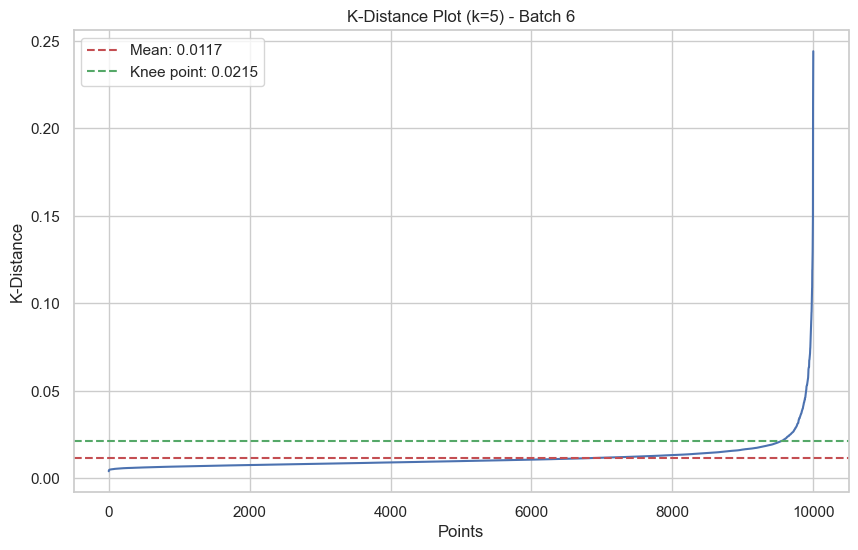

Processing batch 7/38 (points 60000 to 70000)
Estimated optimal eps for batch 7: 0.0210
Processing batch 8/38 (points 70000 to 80000)
Estimated optimal eps for batch 8: 0.0213
Processing batch 9/38 (points 80000 to 90000)
Estimated optimal eps for batch 9: 0.0238
Processing batch 10/38 (points 90000 to 100000)
Estimated optimal eps for batch 10: 0.0252
Processing batch 11/38 (points 100000 to 110000)
Estimated optimal eps for batch 11: 0.0211


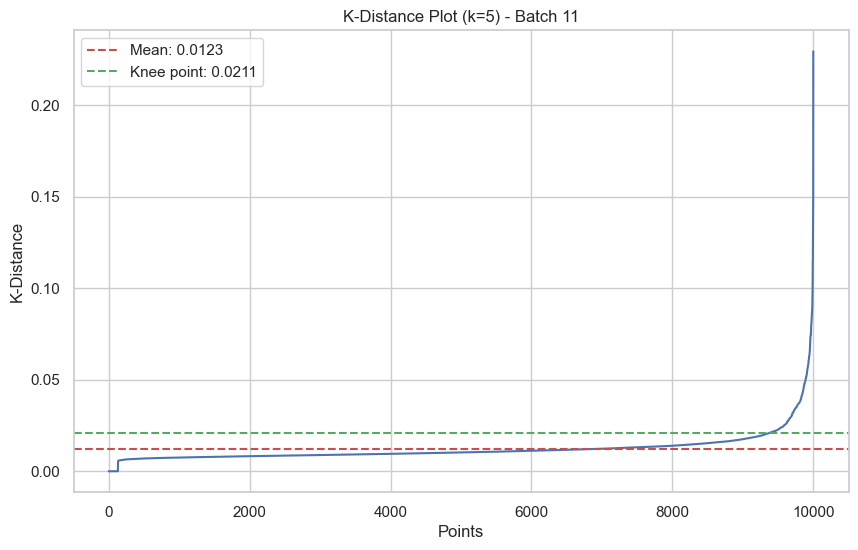

Processing batch 12/38 (points 110000 to 120000)
Estimated optimal eps for batch 12: 0.0282
Processing batch 13/38 (points 120000 to 130000)
Estimated optimal eps for batch 13: 0.0314
Processing batch 14/38 (points 130000 to 140000)
Estimated optimal eps for batch 14: 0.0303
Processing batch 15/38 (points 140000 to 150000)
Estimated optimal eps for batch 15: 0.0376
Processing batch 16/38 (points 150000 to 160000)
Estimated optimal eps for batch 16: 0.0307


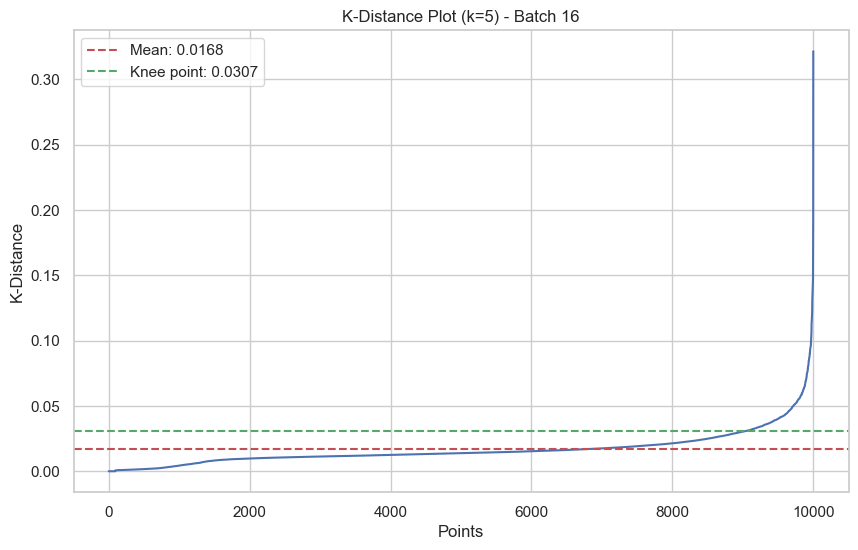

Processing batch 17/38 (points 160000 to 170000)
Estimated optimal eps for batch 17: 0.0269
Processing batch 18/38 (points 170000 to 180000)
Estimated optimal eps for batch 18: 0.0340
Processing batch 19/38 (points 180000 to 190000)
Estimated optimal eps for batch 19: 0.0193
Processing batch 20/38 (points 190000 to 200000)
Estimated optimal eps for batch 20: 0.0278
Processing batch 21/38 (points 200000 to 210000)
Estimated optimal eps for batch 21: 0.0209


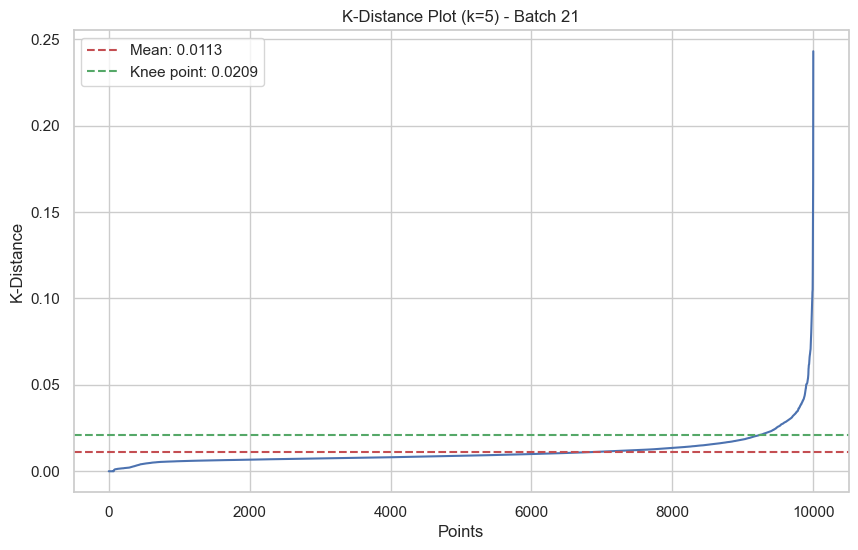

Processing batch 22/38 (points 210000 to 220000)
Estimated optimal eps for batch 22: 0.0210
Processing batch 23/38 (points 220000 to 230000)
Estimated optimal eps for batch 23: 0.0266
Processing batch 24/38 (points 230000 to 240000)
Estimated optimal eps for batch 24: 0.0308
Processing batch 25/38 (points 240000 to 250000)
Estimated optimal eps for batch 25: 0.0262
Processing batch 26/38 (points 250000 to 260000)
Estimated optimal eps for batch 26: 0.0189


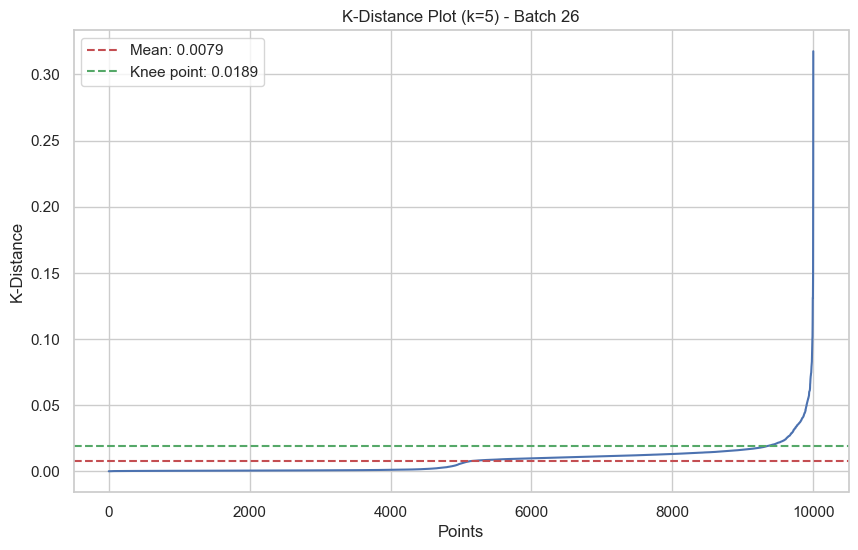

Processing batch 27/38 (points 260000 to 270000)
Estimated optimal eps for batch 27: 0.0204
Processing batch 28/38 (points 270000 to 280000)
Estimated optimal eps for batch 28: 0.0238
Processing batch 29/38 (points 280000 to 290000)
Estimated optimal eps for batch 29: 0.0179
Processing batch 30/38 (points 290000 to 300000)
Estimated optimal eps for batch 30: 0.0211
Processing batch 31/38 (points 300000 to 310000)
Estimated optimal eps for batch 31: 0.0283


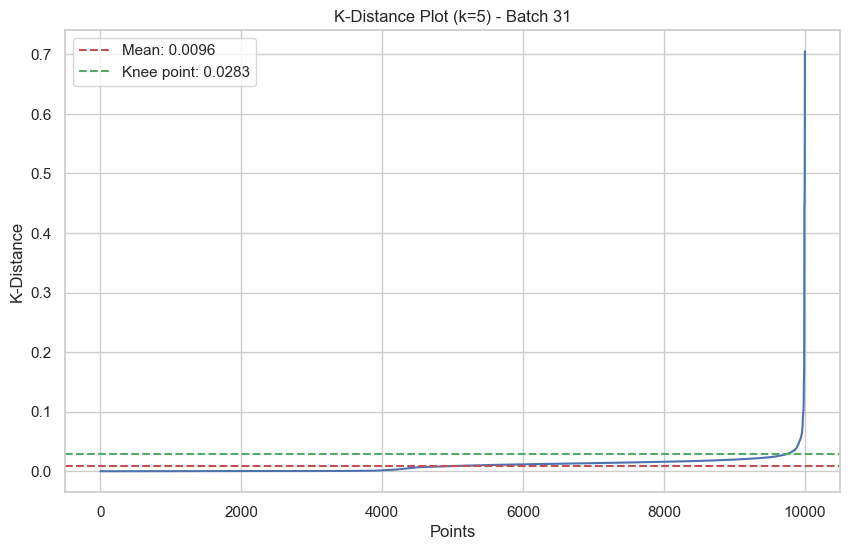

Processing batch 32/38 (points 310000 to 320000)
Estimated optimal eps for batch 32: 0.0230
Processing batch 33/38 (points 320000 to 330000)
Estimated optimal eps for batch 33: 0.0199
Processing batch 34/38 (points 330000 to 340000)
Estimated optimal eps for batch 34: 0.0188
Processing batch 35/38 (points 340000 to 350000)
Estimated optimal eps for batch 35: 0.0104
Processing batch 36/38 (points 350000 to 360000)
Estimated optimal eps for batch 36: 0.0195


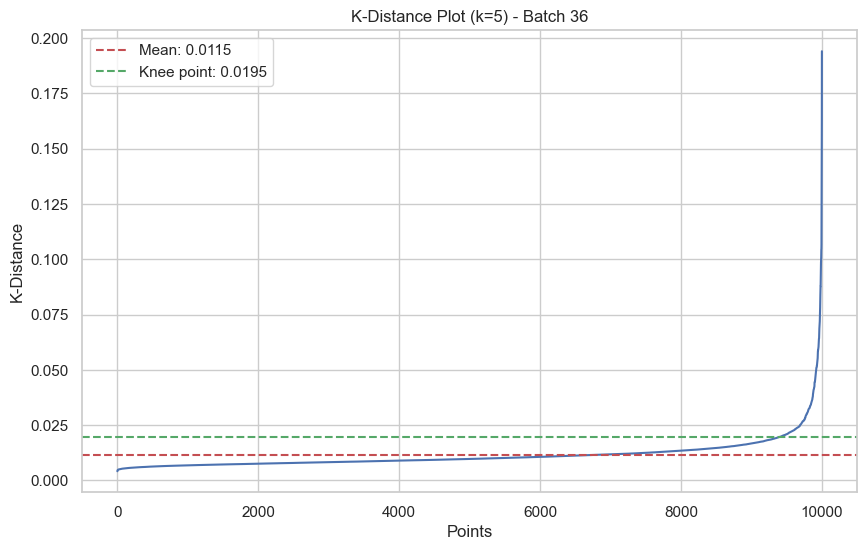

Processing batch 37/38 (points 360000 to 370000)
Estimated optimal eps for batch 37: 0.0128
Processing batch 38/38 (points 370000 to 377719)
Estimated optimal eps for batch 38: 0.0222

Overall estimated optimal eps: 0.0246


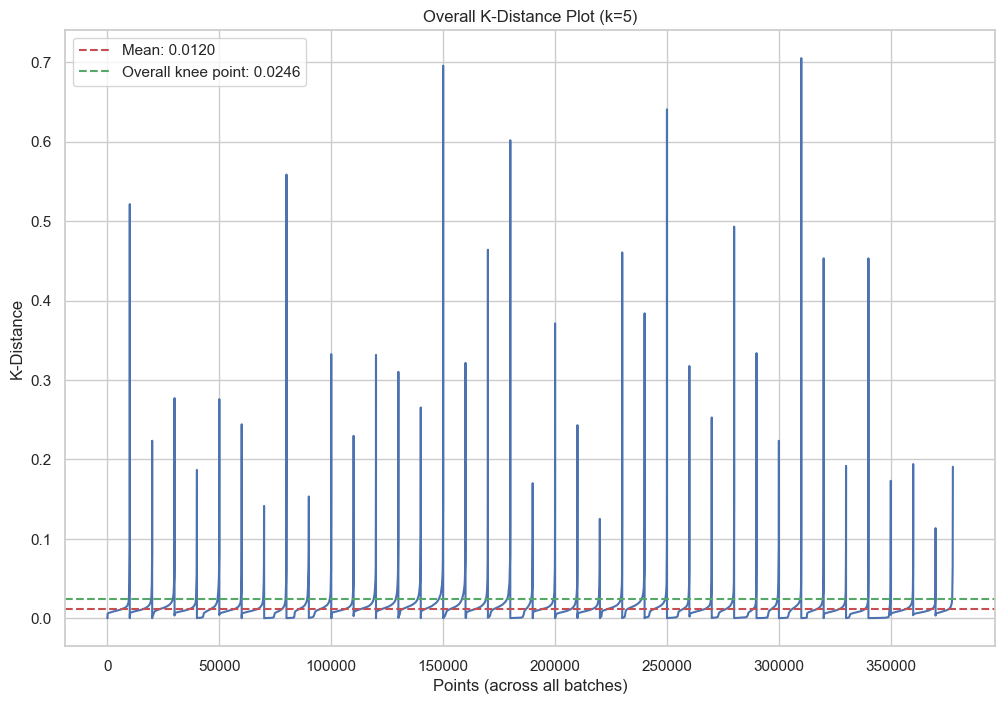

executed


In [14]:
#Processing remaining batches for k-distance
# Processing remaining batches for k-distance calculation
for batch_idx in range(1, num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(X))
    
    print(f"Processing batch {batch_idx+1}/{num_batches} (points {start_idx} to {end_idx})")
    X_batch = X[start_idx:end_idx]
    
    # Computing k-nearest neighbor distances
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_batch)
    distances, indices = nbrs.kneighbors(X_batch)
    
    # Sorting distances (k-th nearest neighbor)
    kdistances = np.sort(distances[:, k])
    all_kdistances.extend(kdistances)
    
    # Creating k-distance plot for this batch
    batch_knee = np.mean(kdistances) + np.std(kdistances)
    print(f"Estimated optimal eps for batch {batch_idx+1}: {batch_knee:.4f}")
    
    # Only save a plot every 5 batches to avoid too many images
    if batch_idx % 5 == 0:
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(kdistances)), kdistances)
        plt.axhline(y=np.mean(kdistances), color='r', linestyle='--', 
                    label=f'Mean: {np.mean(kdistances):.4f}')
        plt.axhline(y=batch_knee, color='g', linestyle='--', 
                    label=f'Knee point: {batch_knee:.4f}')
        plt.xlabel('Points')
        plt.ylabel('K-Distance')
        plt.title(f'K-Distance Plot (k={k}) - Batch {batch_idx+1}')
        plt.legend()
        plt.savefig(f'visualisations/kdistance_batch_{batch_idx+1}.png')
        plt.show()

# Calculating overall optimal eps
overall_knee = np.mean(all_kdistances) + np.std(all_kdistances)
print(f"\nOverall estimated optimal eps: {overall_knee:.4f}")

# Creating overall k-distance plot
plt.figure(figsize=(12, 8))
plt.plot(all_kdistances)
plt.axhline(y=np.mean(all_kdistances), color='r', linestyle='--',
            label=f'Mean: {np.mean(all_kdistances):.4f}')
plt.axhline(y=overall_knee, color='g', linestyle='--',
            label=f'Overall knee point: {overall_knee:.4f}')
plt.xlabel('Points (across all batches)')
plt.ylabel('K-Distance')
plt.title(f'Overall K-Distance Plot (k={k})')
plt.legend()
plt.savefig('visualisations/kdistance_overall.png')
plt.show()
print("executed")

In [15]:
#Testing DBSCAN parameters on a sample
# Testing combinations of eps and min_samples on a data sample
print("Testing DBSCAN parameters using silhouette score...")

# Using a sample of the data to make parameter tuning more efficient
sample_size = min(50000, len(X))  # Using at most 50k points for parameter tuning
X_sample = X[:sample_size]

# Testing different eps values around the estimated knee point
eps_values = [overall_knee * 0.8, overall_knee, overall_knee * 1.2]
print(f"Testing eps values: {eps_values}")

# Storing results for comparison
results = []

# Testing different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_range:
        print(f"Testing DBSCAN with eps={eps:.4f}, min_samples={min_samples}")
        
        try:
            # Running DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_sample)
            
            # Calculating silhouette score if there are at least 2 clusters (not including noise points)
            unique_clusters = set(clusters)
            
            if len(unique_clusters) >= 3 and -1 in unique_clusters and len(unique_clusters) <= sample_size // 2:
                # Removing noise points for silhouette calculation
                valid_indices = clusters != -1
                if np.sum(valid_indices) > 0:
                    silhouette = silhouette_score(X_sample[valid_indices], clusters[valid_indices])
                    n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
                    noise_ratio = np.sum(clusters == -1) / len(clusters)
                    
                    results.append({
                        'eps': eps,
                        'min_samples': min_samples,
                        'silhouette': silhouette,
                        'n_clusters': n_clusters,
                        'noise_ratio': noise_ratio
                    })
                    
                    print(f"  Silhouette score: {silhouette:.4f}, clusters: {n_clusters}, noise: {noise_ratio:.2%}")
            else:
                print(f"  Skipping silhouette calculation (found {len(unique_clusters)} clusters including noise)")
        except Exception as e:
            print(f"  Error with eps={eps}, min_samples={min_samples}: {str(e)}")
print("executed")

Testing DBSCAN parameters using silhouette score...
Testing eps values: [0.019687777134520763, 0.024609721418150952, 0.029531665701781142]
Testing DBSCAN with eps=0.0197, min_samples=10
  Silhouette score: 0.2015, clusters: 33, noise: 6.46%
Testing DBSCAN with eps=0.0197, min_samples=20
  Silhouette score: 0.6327, clusters: 13, noise: 9.34%
Testing DBSCAN with eps=0.0197, min_samples=30
  Silhouette score: 0.2803, clusters: 8, noise: 11.06%
Testing DBSCAN with eps=0.0197, min_samples=40
  Silhouette score: 0.6584, clusters: 5, noise: 12.34%
Testing DBSCAN with eps=0.0197, min_samples=50
  Silhouette score: 0.6668, clusters: 4, noise: 13.45%
Testing DBSCAN with eps=0.0197, min_samples=60
  Silhouette score: 0.6860, clusters: 5, noise: 14.56%
Testing DBSCAN with eps=0.0197, min_samples=70
  Silhouette score: 0.5989, clusters: 6, noise: 15.67%
Testing DBSCAN with eps=0.0197, min_samples=80
  Silhouette score: 0.7035, clusters: 5, noise: 16.63%
Testing DBSCAN with eps=0.0197, min_samples=9


DBSCAN Parameter Testing Results:


eps  min_samples  silhouette  n_clusters  noise_ratio
0   0.019688           10    0.201452          33      0.06456
1   0.019688           20    0.632681          13      0.09338
2   0.019688           30    0.280284           8      0.11060
3   0.019688           40    0.658372           5      0.12338
4   0.019688           50    0.666826           4      0.13446
5   0.019688           60    0.685952           5      0.14558
6   0.019688           70    0.598863           6      0.15674
7   0.019688           80    0.703507           5      0.16630
8   0.019688           90    0.709476           5      0.17496
9   0.019688          100    0.709318           6      0.18550
10  0.024610           10    0.448945          22      0.04060
11  0.024610           20    0.810940          13      0.06168
12  0.024610           30    0.887668           5      0.07554
13  0.024610           40    0.641601           4      0.08172
14  0.024610           50    0.643551           5      0.08520
15  0.024610           60    0.647557           4      0.09048
16  0.024610           70    0.650170           4      0.09486
17  0.024610           80    0.652672           4      0.09858
18  0.024610           90    0.654883           4      0.10240
19  0.024610          100    0.657666           4      0.10534
20  0.029532           10    0.512651          21      0.02586
21  0.029532           20    0.791064          15      0.04096
22  0.029532           30    0.850222          10      0.05622
23  0.029532           40    0.893465           4      0.06492
24  0.029532           50    0.894714           4      0.06724
25  0.029532           60    0.895292           4      0.07002
26  0.029532           70    0.907931           3      0.07316
27  0.029532           80    0.909110           3      0.07512
28  0.029532           90    0.642417           4      0.07678
29  0.029532          100    0.643144           4      0.07834


Best parameters based on silhouette score:
eps = 0.0295
min_samples = 80
silhouette score = 0.9091
number of clusters = 3.0
noise ratio = 7.51%


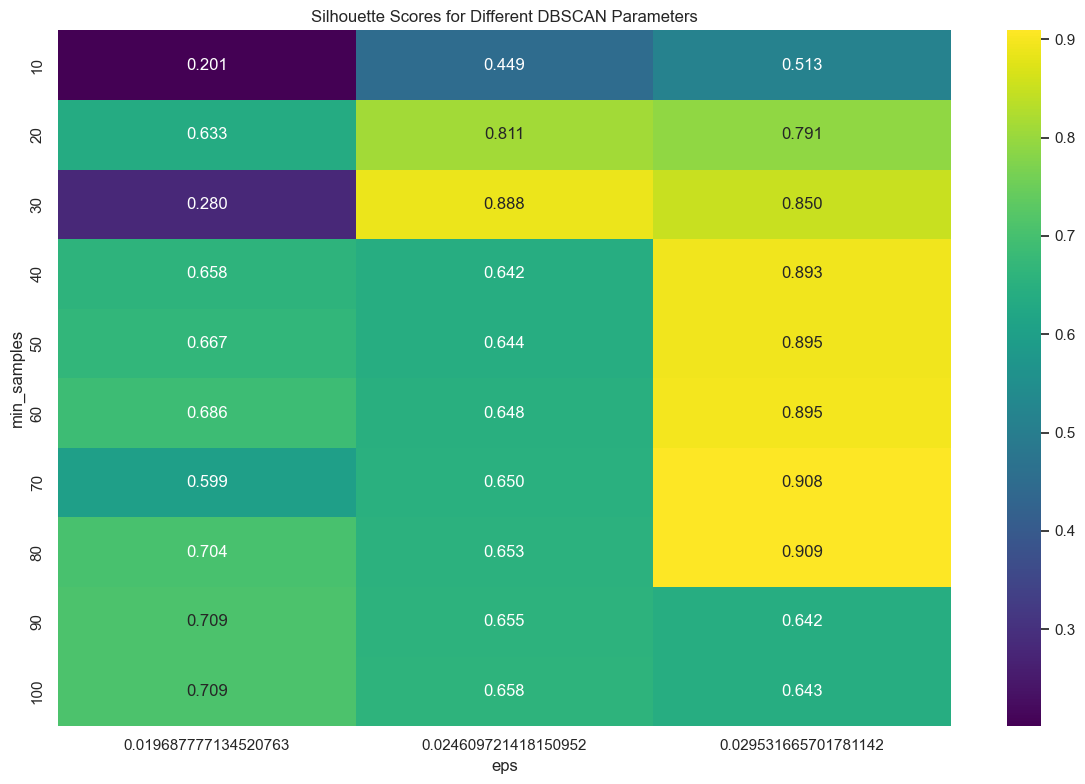

executed


In [18]:
#Visualizing parameter testing results and selecting the best
# Visualizing parameter testing results and selecting the best combination
if len(results) > 0:
    # Converting results to DataFrame for easier analysis
    results_df = pd.DataFrame(results)
    
    # Saving parameter testing results
    results_df.to_csv('results/dbscan_parameter_testing.csv', index=False)
    
    # Displaying the results
    print("\nDBSCAN Parameter Testing Results:")
    display(results_df)
    
    # Finding the best parameters based on silhouette score
    # Finding the best parameters based on silhouette score
    best_result = results_df.loc[results_df['silhouette'].idxmax()]
    optimal_eps = best_result['eps']
    optimal_min_samples = int(best_result['min_samples'])  # Convert to int
    
    print(f"\nBest parameters based on silhouette score:")
    print(f"eps = {optimal_eps:.4f}")
    print(f"min_samples = {optimal_min_samples}")
    print(f"silhouette score = {best_result['silhouette']:.4f}")
    print(f"number of clusters = {best_result['n_clusters']}")
    print(f"noise ratio = {best_result['noise_ratio']:.2%}")
    
    # Visualizing parameter testing results with a heatmap
    if len(eps_values) > 1 and len(min_samples_range) > 1:
        plt.figure(figsize=(12, 8))
        pivot_table = results_df.pivot_table(index='min_samples', columns='eps', values='silhouette')
        sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
        plt.title('Silhouette Scores for Different DBSCAN Parameters')
        plt.tight_layout()
        plt.savefig('visualisations/dbscan_parameter_testing.png')
        plt.show()
else:
    print("\nNo valid parameter combinations found. Using default values:")
    optimal_eps = overall_knee
    optimal_min_samples = 20  # Default value
    print(f"eps = {optimal_eps:.4f}")
    print(f"min_samples = {optimal_min_samples}")
print("executed")

In [19]:
# Running DBSCAN for anomaly detection with the optimal parameters
print(f"Detecting anomalies using DBSCAN with eps={optimal_eps:.4f}, min_samples={optimal_min_samples}...")

# Making sure min_samples is an integer
optimal_min_samples = int(optimal_min_samples)
print(f"Converted min_samples to int: {optimal_min_samples}")

# Running DBSCAN on the full dataset
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
clusters = dbscan.fit_predict(X)

# Adding cluster information to the dataframe
scaled_df['cluster'] = clusters

# Identifying anomalies (points labeled as -1 are noise/anomalies)
scaled_df['is_anomaly'] = (clusters == -1).astype(int)

# Counting the number of anomalies
anomaly_count = scaled_df['is_anomaly'].sum()
anomaly_percentage = anomaly_count / len(scaled_df) * 100

print(f"Detected {anomaly_count} anomalies ({anomaly_percentage:.2f}% of the data)")

# Displaying cluster information
cluster_counts = scaled_df['cluster'].value_counts().sort_index()
print("\nCluster distribution:")
display(cluster_counts)

# Saving the results
scaled_df.to_csv('results/anomaly_detection_results.csv', index=False)
print("executed")

Detecting anomalies using DBSCAN with eps=0.0295, min_samples=80...
Converted min_samples to int: 80
Detected 20740 anomalies (5.49% of the data)

Cluster distribution:


cluster
-1      20740
 0     284056
 1        196
 2      68950
 3       1066
 4        321
 5       1315
 6         81
 7         98
 8        628
 9        159
 10       109
Name: count, dtype: int64

executed


In [21]:
#Identifying continuous anomaly periods
# Identifying continuous time periods of anomalies
print("Identifying continuous anomaly periods...")

# Extracting anomaly data
anomaly_df = scaled_df[scaled_df['is_anomaly'] == 1].copy()

# Sorting by time
anomaly_df = anomaly_df.sort_values('time')

# Defining function to identify continuous periods
def identify_periods(timestamps):
    """
    Identifying continuous periods in a series of timestamps
    """
    if len(timestamps) == 0:
        return []
    
    periods = []
    start_time = timestamps.iloc[0]
    prev_time = timestamps.iloc[0]
    
    for i in range(1, len(timestamps)):
        current_time = timestamps.iloc[i]
        # Checking if the difference is more than 5 minutes (the expected interval)
        if (current_time - prev_time).total_seconds() > 5 * 60 * 1.5:  # 1.5 times the expected interval
            periods.append((start_time, prev_time))
            start_time = current_time
        prev_time = current_time
    
    # Adding the last period
    periods.append((start_time, prev_time))
    
    return periods

# Identifying anomaly periods
anomaly_periods = identify_periods(anomaly_df['time'])

# Displaying anomaly periods
print(f"Identified {len(anomaly_periods)} continuous anomaly periods")

# Saving anomaly periods to a file
with open('results/anomaly_periods.txt', 'w') as f:
    f.write(f"Detected {len(anomaly_periods)} anomaly periods:\n\n")
    for i, (start, end) in enumerate(anomaly_periods, 1):
        duration = (end - start).total_seconds() / 60  # duration in minutes
        f.write(f"Period {i}: {start} to {end} (Duration: {duration:.1f} minutes)\n")

# Displaying the top 10 anomaly periods by duration
sorted_periods = sorted(anomaly_periods, 
                       key=lambda x: (x[1] - x[0]).total_seconds(), 
                       reverse=True)

print("\nTop 10 anomaly periods by duration:")
for i, (start, end) in enumerate(sorted_periods[:10], 1):
    duration = (end - start).total_seconds() / 60  # duration in minutes
    duration_str = f"{duration:.1f} minutes"
    if duration >= 60:
        duration_str = f"{duration/60:.1f} hours"
    print(f"{i}. {start} to {end} (Duration: {duration_str})")
print("executed")

Identifying continuous anomaly periods...
Identified 3821 continuous anomaly periods

Top 10 anomaly periods by duration:
1. 2018-04-28 17:05:00 to 2018-04-29 21:05:00 (Duration: 28.0 hours)
2. 2018-05-16 10:55:00 to 2018-05-17 14:30:00 (Duration: 27.6 hours)
3. 2019-03-17 18:50:00 to 2019-03-18 17:10:00 (Duration: 22.3 hours)
4. 2018-10-18 08:55:00 to 2018-10-19 00:30:00 (Duration: 15.6 hours)
5. 2018-06-05 10:20:00 to 2018-06-06 01:45:00 (Duration: 15.4 hours)
6. 2018-06-21 02:50:00 to 2018-06-21 18:15:00 (Duration: 15.4 hours)
7. 2019-06-22 01:30:00 to 2019-06-22 16:45:00 (Duration: 15.2 hours)
8. 2019-12-24 18:25:00 to 2019-12-25 09:35:00 (Duration: 15.2 hours)
9. 2018-05-01 00:40:00 to 2018-05-01 15:45:00 (Duration: 15.1 hours)
10. 2017-09-19 00:35:00 to 2017-09-19 15:35:00 (Duration: 15.0 hours)
executed


In [22]:
#Identifying continuous anomaly periods
# Identifying continuous time periods of anomalies
print("Identifying continuous anomaly periods...")

# Extracting anomaly data
anomaly_df = scaled_df[scaled_df['is_anomaly'] == 1].copy()

# Sorting by time
anomaly_df = anomaly_df.sort_values('time')

# Defining function to identify continuous periods
def identify_periods(timestamps):
    """
    Identifying continuous periods in a series of timestamps
    """
    if len(timestamps) == 0:
        return []
    
    periods = []
    start_time = timestamps.iloc[0]
    prev_time = timestamps.iloc[0]
    
    for i in range(1, len(timestamps)):
        current_time = timestamps.iloc[i]
        # Checking if the difference is more than 5 minutes (the expected interval)
        if (current_time - prev_time).total_seconds() > 5 * 60 * 1.5:  # 1.5 times the expected interval
            periods.append((start_time, prev_time))
            start_time = current_time
        prev_time = current_time
    
    # Adding the last period
    periods.append((start_time, prev_time))
    
    return periods

# Identifying anomaly periods
anomaly_periods = identify_periods(anomaly_df['time'])

# Displaying anomaly periods
print(f"Identified {len(anomaly_periods)} continuous anomaly periods")

# Saving anomaly periods to a file
with open('results/anomaly_periods.txt', 'w') as f:
    f.write(f"Detected {len(anomaly_periods)} anomaly periods:\n\n")
    for i, (start, end) in enumerate(anomaly_periods, 1):
        duration = (end - start).total_seconds() / 60  # duration in minutes
        f.write(f"Period {i}: {start} to {end} (Duration: {duration:.1f} minutes)\n")

# Displaying the top 10 anomaly periods by duration
sorted_periods = sorted(anomaly_periods, 
                       key=lambda x: (x[1] - x[0]).total_seconds(), 
                       reverse=True)

print("\nTop 10 anomaly periods by duration:")
for i, (start, end) in enumerate(sorted_periods[:10], 1):
    duration = (end - start).total_seconds() / 60  # duration in minutes
    duration_str = f"{duration:.1f} minutes"
    if duration >= 60:
        duration_str = f"{duration/60:.1f} hours"
    print(f"{i}. {start} to {end} (Duration: {duration_str})")

Identifying continuous anomaly periods...
Identified 3821 continuous anomaly periods

Top 10 anomaly periods by duration:
1. 2018-04-28 17:05:00 to 2018-04-29 21:05:00 (Duration: 28.0 hours)
2. 2018-05-16 10:55:00 to 2018-05-17 14:30:00 (Duration: 27.6 hours)
3. 2019-03-17 18:50:00 to 2019-03-18 17:10:00 (Duration: 22.3 hours)
4. 2018-10-18 08:55:00 to 2018-10-19 00:30:00 (Duration: 15.6 hours)
5. 2018-06-05 10:20:00 to 2018-06-06 01:45:00 (Duration: 15.4 hours)
6. 2018-06-21 02:50:00 to 2018-06-21 18:15:00 (Duration: 15.4 hours)
7. 2019-06-22 01:30:00 to 2019-06-22 16:45:00 (Duration: 15.2 hours)
8. 2019-12-24 18:25:00 to 2019-12-25 09:35:00 (Duration: 15.2 hours)
9. 2018-05-01 00:40:00 to 2018-05-01 15:45:00 (Duration: 15.1 hours)
10. 2017-09-19 00:35:00 to 2017-09-19 15:35:00 (Duration: 15.0 hours)


Creating visualizations of anomalies...


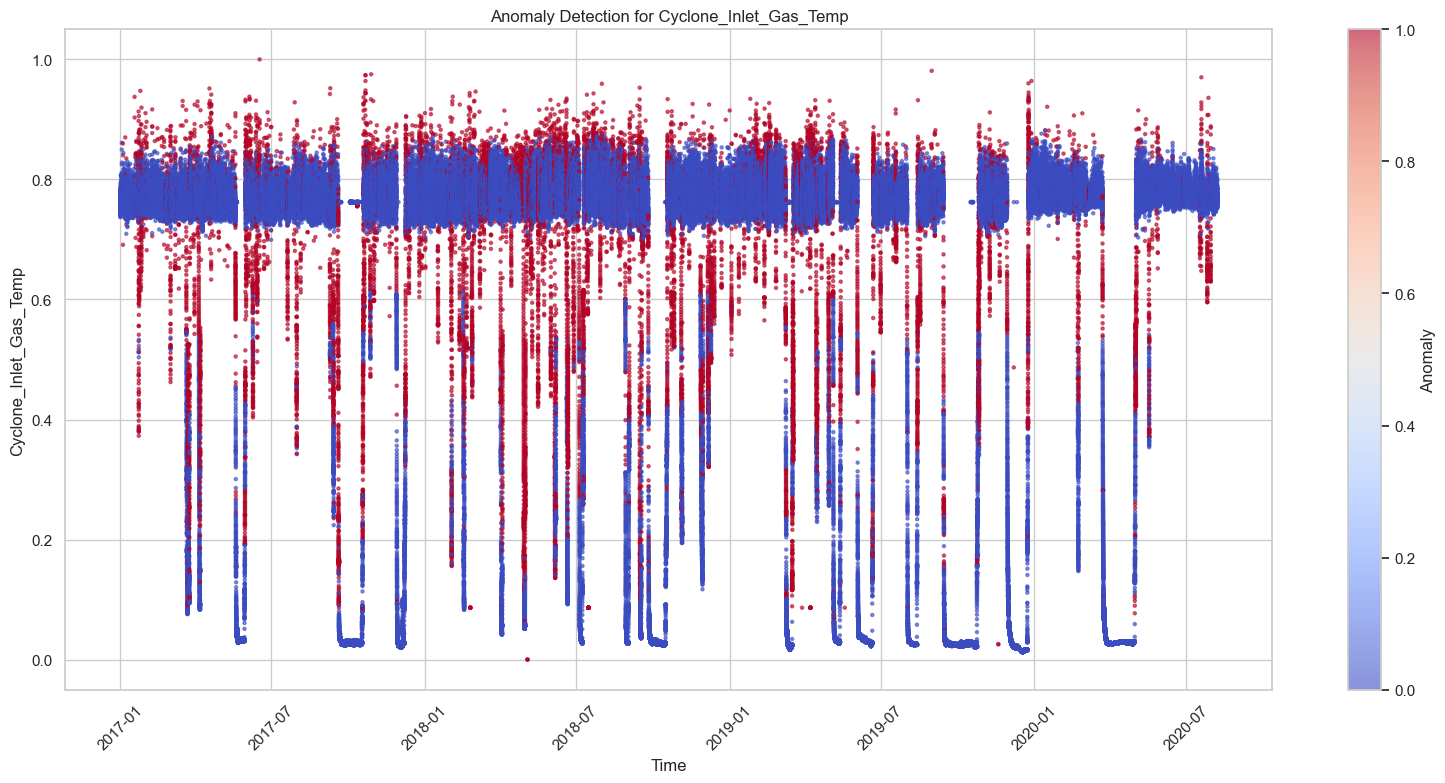

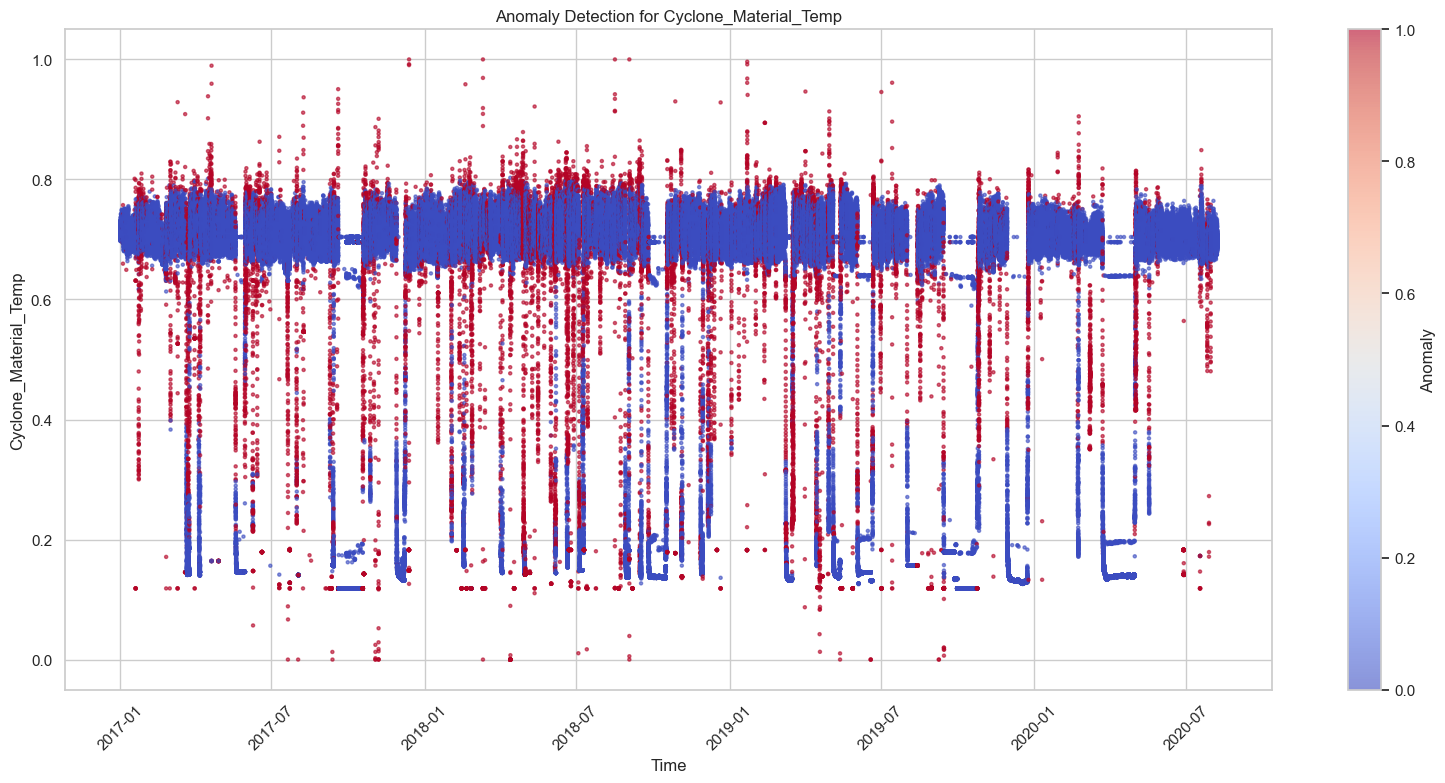

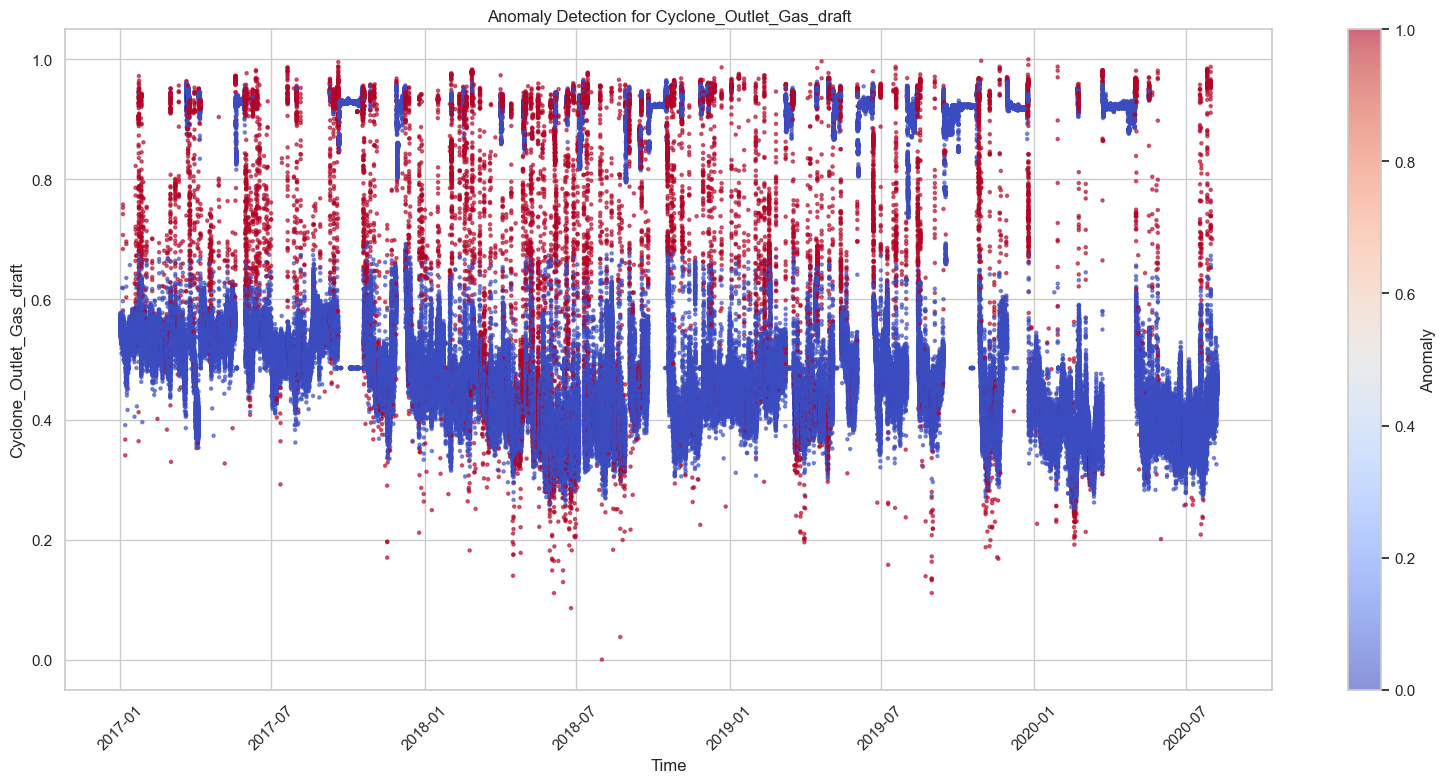

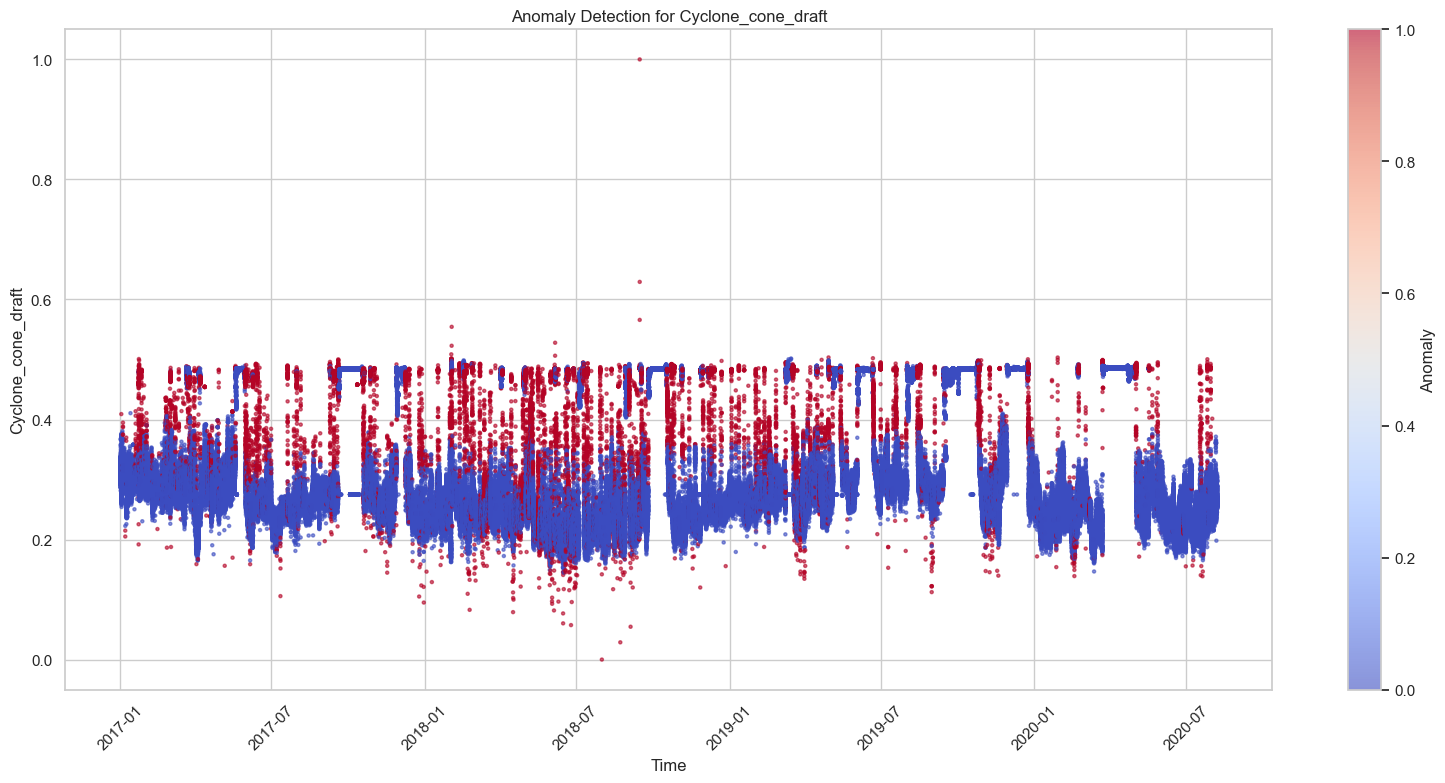

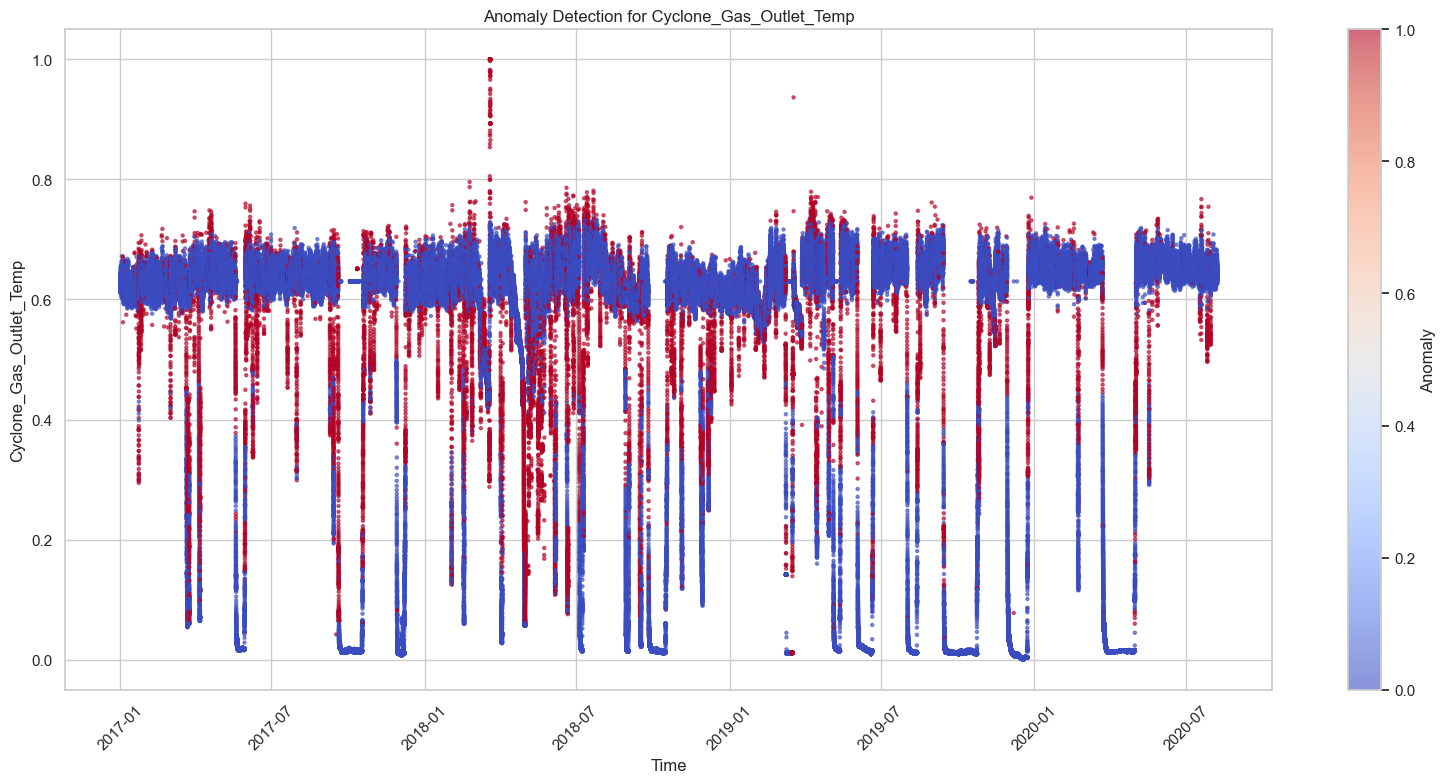

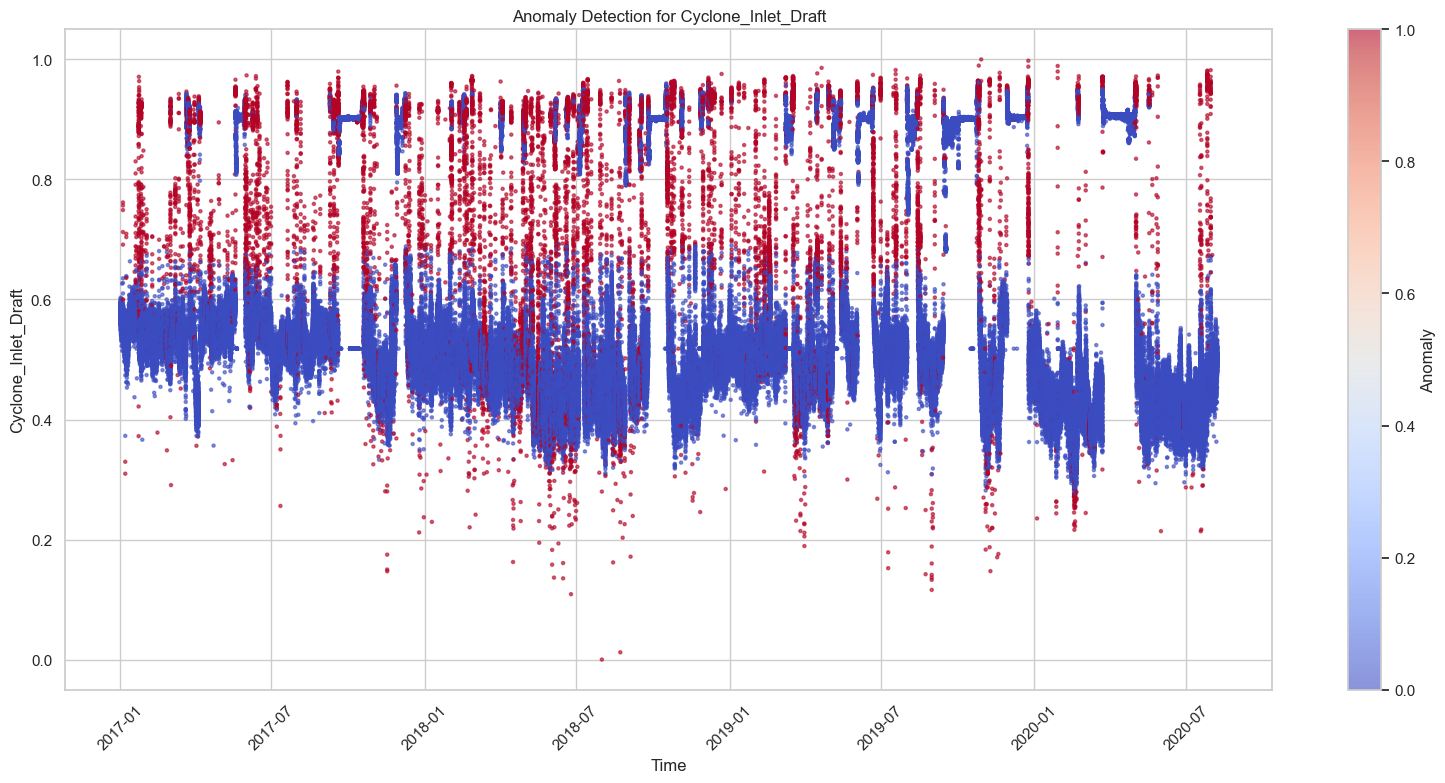

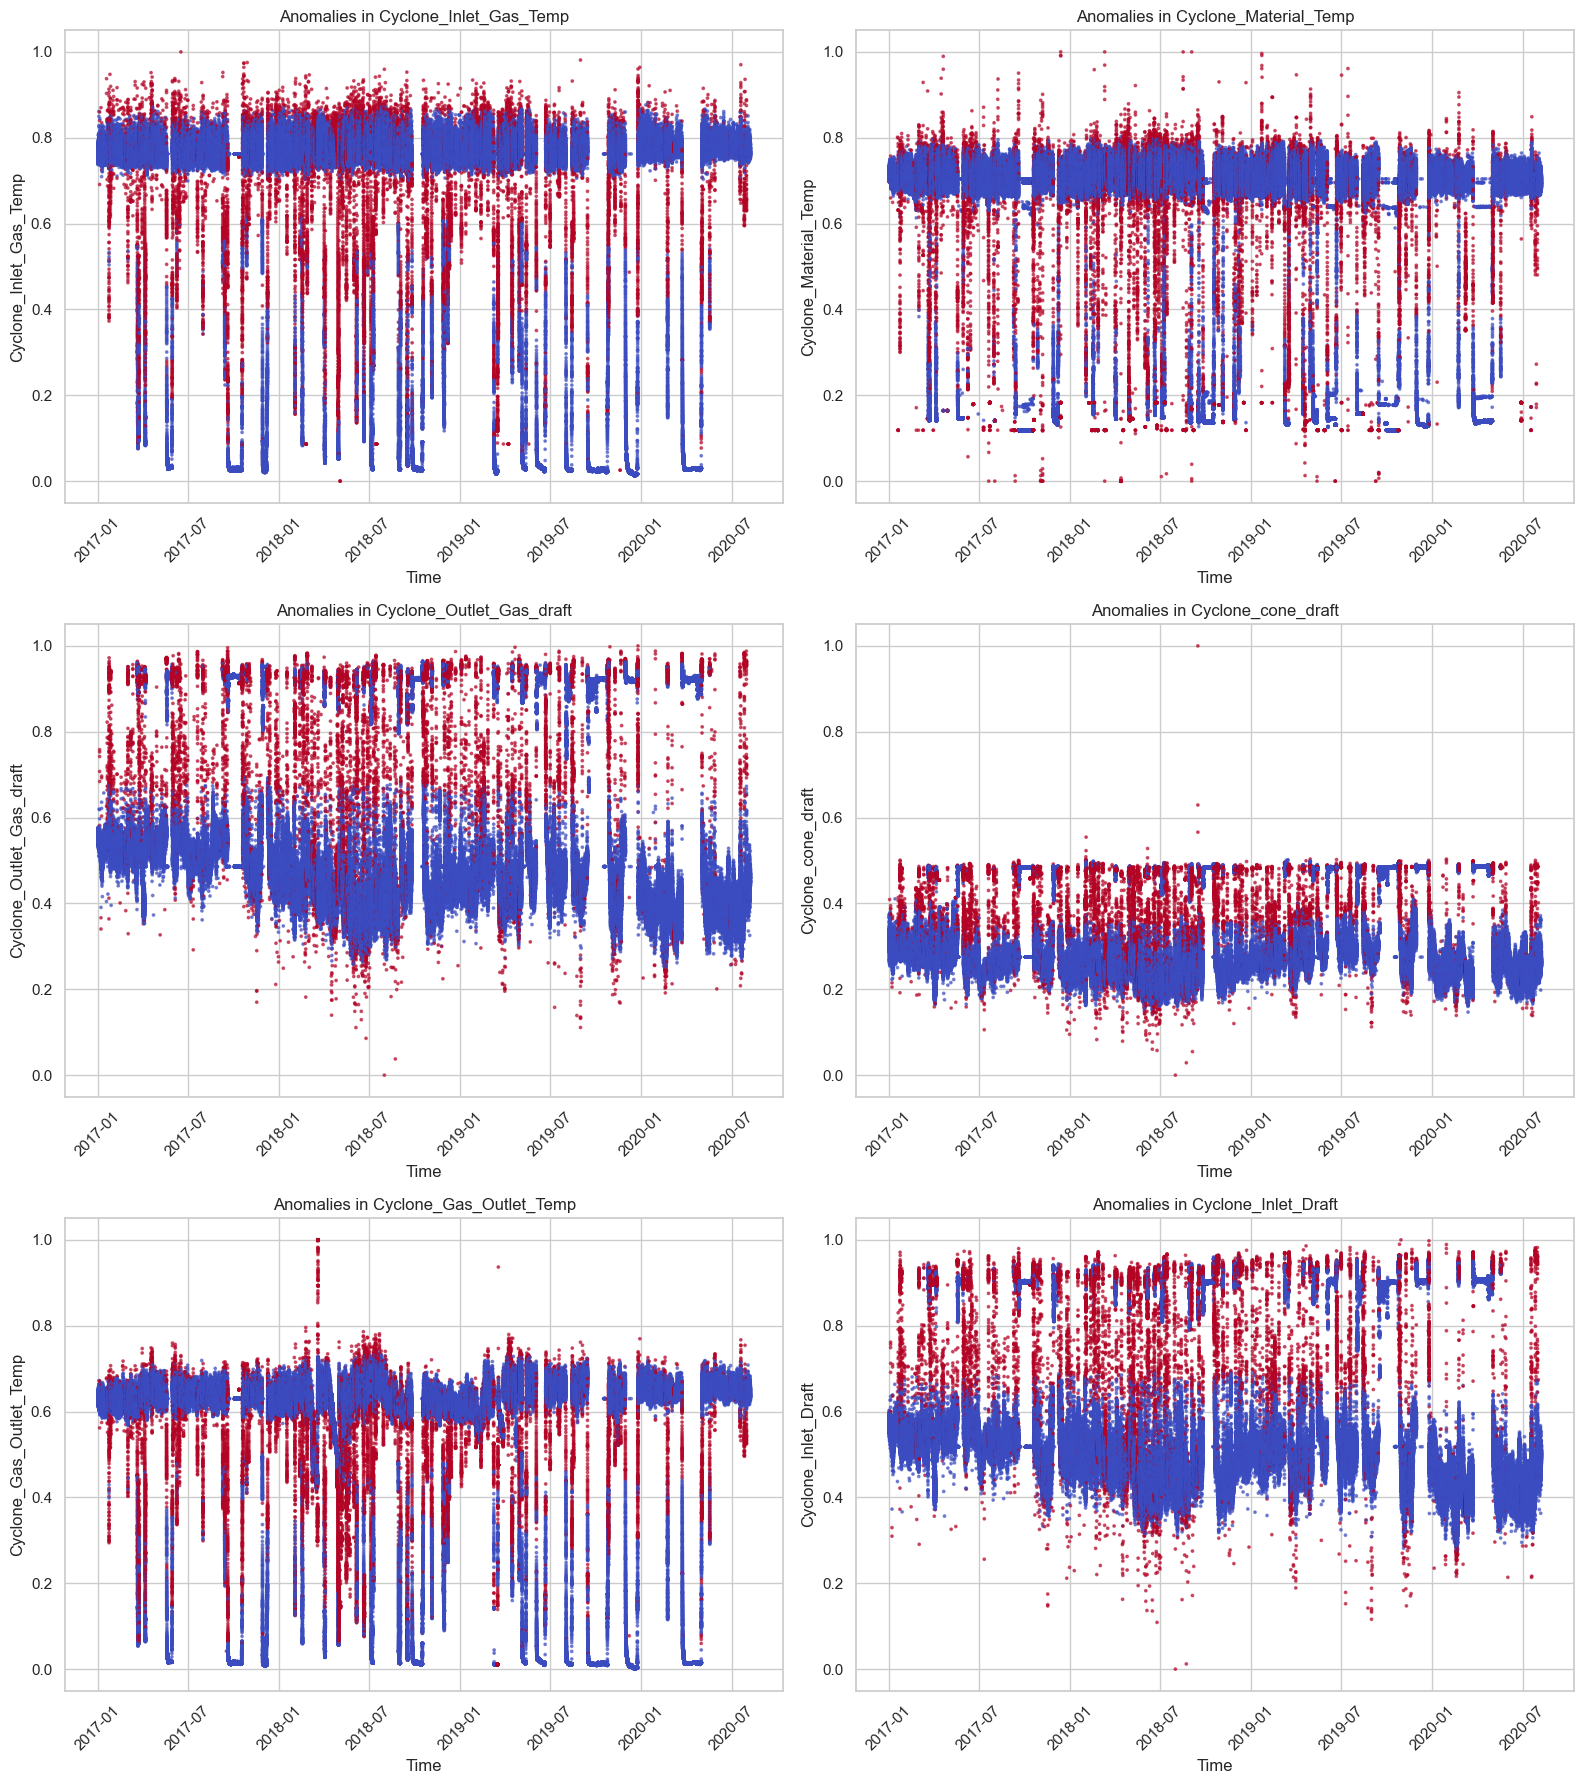

executed


In [23]:
#Visualizing anomalies for each feature
# Visualizing anomalies for each feature
print("Creating visualizations of anomalies...")

# Visualizing anomalies for each feature
for col in numeric_columns:
    plt.figure(figsize=(16, 8))
    
    # Plotting the time series data
    plt.scatter(scaled_df['time'], scaled_df[col], c=scaled_df['is_anomaly'], 
               cmap='coolwarm', alpha=0.6, s=5)
    plt.colorbar(label='Anomaly')
    plt.title(f'Anomaly Detection for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'results/anomaly_{col}.png')
    plt.show()

# Creating a unified plot with all features
plt.figure(figsize=(16, 18))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    plt.scatter(scaled_df['time'], scaled_df[col], c=scaled_df['is_anomaly'], 
               cmap='coolwarm', alpha=0.6, s=3)
    plt.title(f'Anomalies in {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('results/all_anomalies.png')
plt.show()
print("executed")